Importing the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
import numpy as np
df= pd.read_csv('Train_data.csv') #Data frame

Printing the data fileds and their types

In [ ]:
print(df.columns)

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')


In [ ]:
print(df.dtypes)
numeric_cols = df.select_dtypes(include=[np.number]).columns

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

Finding the missing data is done by using the isnull function to return an array with true for all the missing cells in each coluumn and then it is summed using sum function which counts the number of trues which correspond to missing cells

In [ ]:
missing_data_per_column = df.isnull().sum()
missing_data_total=missing_data_per_column .sum()
print("Missing Data in Each Column:")
print(missing_data_per_column)
if(missing_data_total==0):
    print("No missing values")
    print(missing_data_total )
else: 
    print("There are missing values")
    print(missing_data_total )
    

Missing Data in Each Column:
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate 

The isin() method checks whether each element in the DataFrame is contained in the specified list (in this case, [infinty', -infinty']).
It returns a DataFrame of the same shape, with True where the value is infinite and False elsewhere.

In [ ]:
inf_count_per_column=df.isin([float('inf'),float('-inf')]).sum()
inf_count=inf_count_per_column.sum()
if(inf_count==0):
    print("No Infinte values")
    print(inf_count)
else: 
    print("There are infinite values")
    print(inf_count)

No Infinte values
0


 Get the number of unique categories in each column

In [ ]:
category_counts = df.nunique()
print(category_counts)

duration                        758
protocol_type                     3
service                          66
flag                             11
src_bytes                      1665
dst_bytes                      3922
land                              2
wrong_fragment                    3
urgent                            2
hot                              22
num_failed_logins                 5
logged_in                         2
num_compromised                  28
root_shell                        2
su_attempted                      3
num_root                         28
num_file_creations               20
num_shells                        2
num_access_files                  7
num_outbound_cmds                 1
is_host_login                     1
is_guest_login                    2
count                           466
srv_count                       414
serror_rate                      70
srv_serror_rate                  56
rerror_rate                      72
srv_rerror_rate             

include='number' this helps in icluding columns only with numerical data type

In [ ]:
for column in df.select_dtypes(include='number').columns:
    max_value = df[column].max()   
    min_value = df[column].min()
    mean_value = df[column].mean()  
    variance_value = df[column].var()  
    print(f"Statistics for column '{column}':")
    print(f"  Maximum: {max_value}")
    print(f"  Minimum: {min_value}")
    print(f"  Average: {mean_value}")
    print(f"  Variance: {variance_value}")
    print()

Statistics for column 'duration':
  Maximum: 42862
  Minimum: 0
  Average: 305.05410447761193
  Variance: 7217581.207147616

Statistics for column 'src_bytes':
  Maximum: 381709090
  Minimum: 0
  Average: 24330.628215306446
  Variance: 5811982686446.22

Statistics for column 'dst_bytes':
  Maximum: 5151385
  Minimum: 0
  Average: 3491.8471737059385
  Variance: 7890896518.939051

Statistics for column 'land':
  Maximum: 1
  Minimum: 0
  Average: 7.939028262940616e-05
  Variance: 7.938713109581757e-05

Statistics for column 'wrong_fragment':
  Maximum: 3
  Minimum: 0
  Average: 0.023737694506192442
  Variance: 0.06771485287147382

Statistics for column 'urgent':
  Maximum: 1
  Minimum: 0
  Average: 3.969514131470308e-05
  Variance: 3.9695141314703075e-05

Statistics for column 'hot':
  Maximum: 77
  Minimum: 0
  Average: 0.19803906001905366
  Variance: 4.640585253843236

Statistics for column 'num_failed_logins':
  Maximum: 4
  Minimum: 0
  Average: 0.0011908542394410925
  Variance: 0.00

the qcut() functon take the number of parts you want to split your column ionto and does it automatically
groupby() creates 4  distinct groups of data one for each quarter
agg() gets the wanted values for each group in one go

In [ ]:
print("\nQuarterly statistics:")
for col in df.select_dtypes(include=np.number).columns:
    try:
        # Use duplicates='drop' to handle duplicate bin edges
        quantiles = pd.qcut(df[col], 4, duplicates='drop')
        grouped_data = df.groupby(quantiles)[col].agg(['min', 'max', 'mean', 'var'])
        print(f"{col} Quarters statistics:")
        print(grouped_data)
    except ValueError as e:
        print(f"Error processing column {col}: {e}")


Quarterly statistics:
duration Quarters statistics:
                   min    max        mean           var
duration                                               
(-0.001, 42862.0]    0  42862  305.054104  7.217581e+06
src_bytes Quarters statistics:
                      min        max          mean           var
src_bytes                                                       
(-0.001, 44.0]          0         44      5.045660  1.495516e+02
(44.0, 279.0]          45        279    183.147306  4.720944e+03
(279.0, 381709090.0]  280  381709090  97274.750994  2.327689e+13
dst_bytes Quarters statistics:
                     min      max          mean           var
dst_bytes                                                    
(-0.001, 530.25]       0      530     63.371123  1.572742e+04
(530.25, 5151385.0]  531  5151385  13777.275326  3.142622e+10
land Quarters statistics:
               min  max      mean       var
land                                       
(-0.001, 1.0]    0    1  0.000

C:\Users\Admin\AppData\Local\Temp\ipykernel_11284\741883037.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(quantiles)[col].agg(['min', 'max', 'mean', 'var'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_11284\741883037.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(quantiles)[col].agg(['min', 'max', 'mean', 'var'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_11284\741883037.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or obse

srv_serror_rate Quarters statistics:
                 min  max      mean       var
srv_serror_rate                              
(-0.001, 1.0]    0.0  1.0  0.283762  0.200345
rerror_rate Quarters statistics:
               min  max     mean       var
rerror_rate                               
(-0.001, 1.0]  0.0  1.0  0.11863  0.101599
srv_rerror_rate Quarters statistics:
                 min  max     mean     var
srv_rerror_rate                           
(-0.001, 1.0]    0.0  1.0  0.12026  0.1039
same_srv_rate Quarters statistics:
                min   max      mean       var
same_srv_rate                                
(-0.001, 0.09]  0.0  0.09  0.042537  0.000758
(0.09, 1.0]     0.1  1.00  0.869191  0.085801
diff_srv_rate Quarters statistics:
                 min   max      mean       var
diff_srv_rate                                 
(-0.001, 0.06]  0.00  0.06  0.014788  0.000623
(0.06, 1.0]     0.07  1.00  0.292545  0.119197
srv_diff_host_rate Quarters statistics:
               

C:\Users\Admin\AppData\Local\Temp\ipykernel_11284\741883037.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(quantiles)[col].agg(['min', 'max', 'mean', 'var'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_11284\741883037.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(quantiles)[col].agg(['min', 'max', 'mean', 'var'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_11284\741883037.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or obse

# Step 3: Calculate and plot the PMF or PDF for each field 

1- by identifying the data types so we can see which of the columns is discrete and which is continous 
2-calculating the frequency of each value so we can crete a probability 


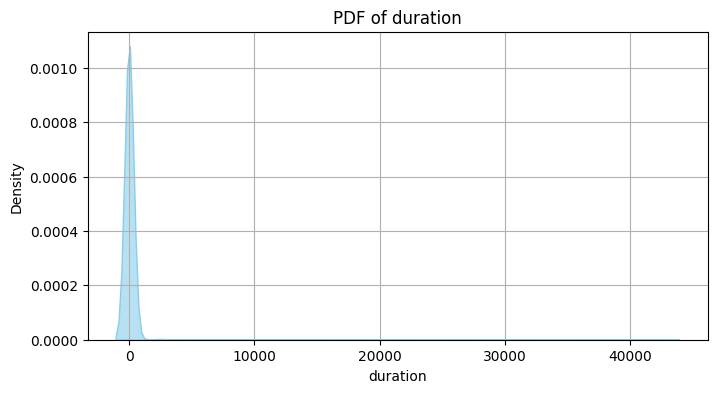

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

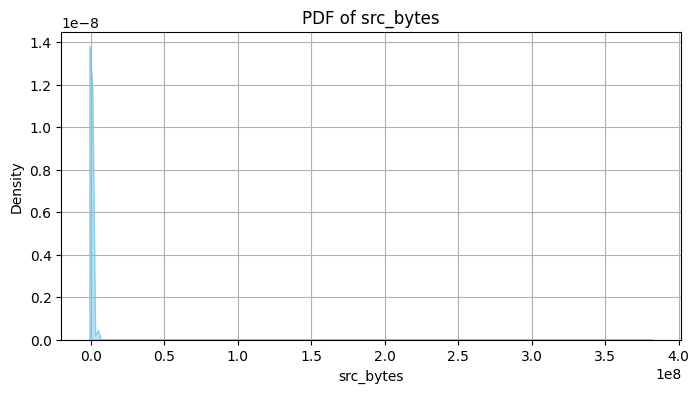

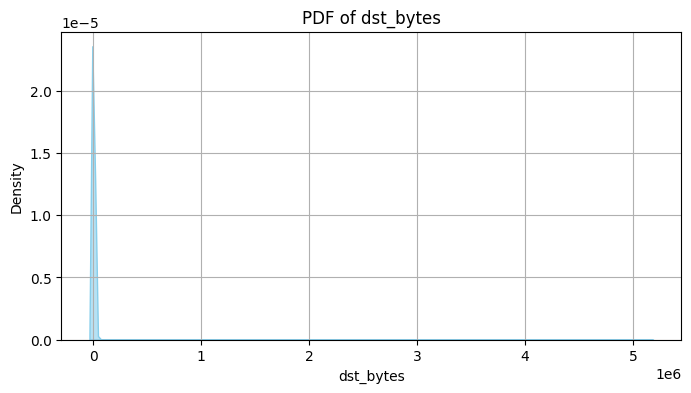

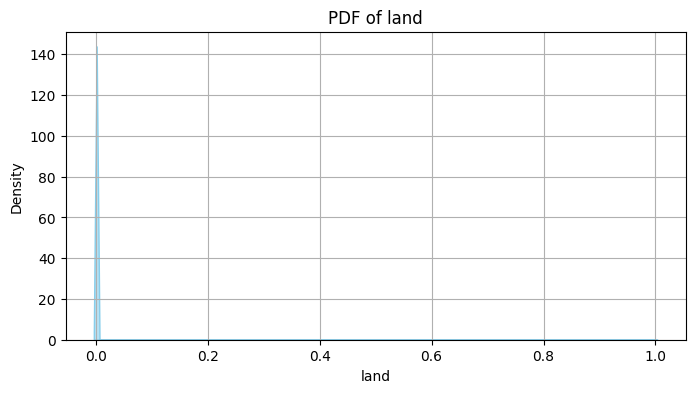

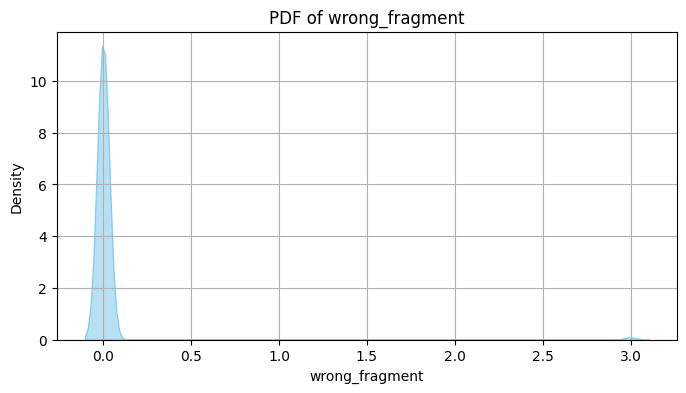

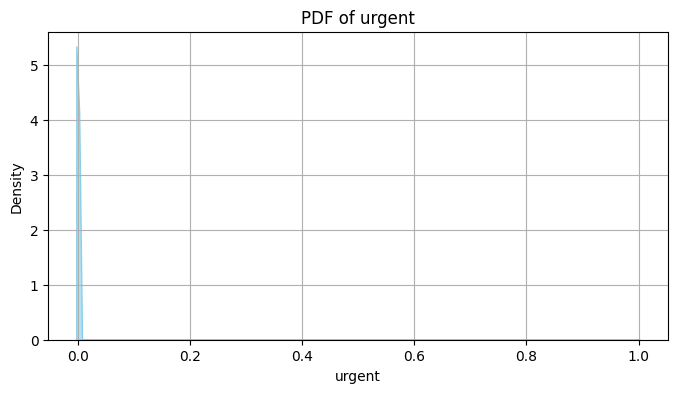

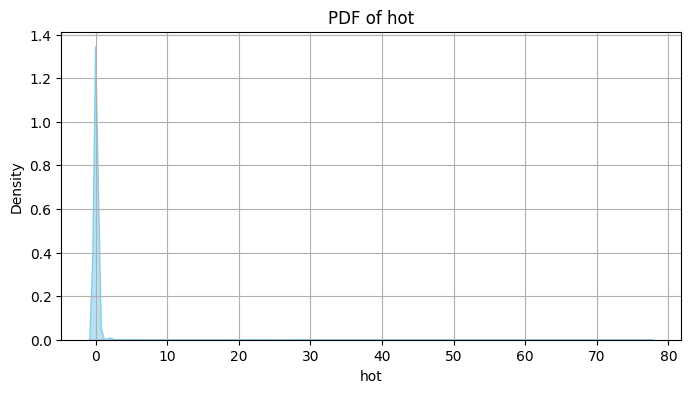

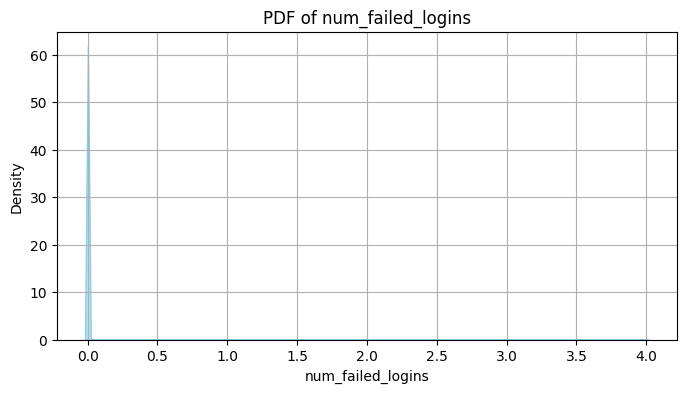

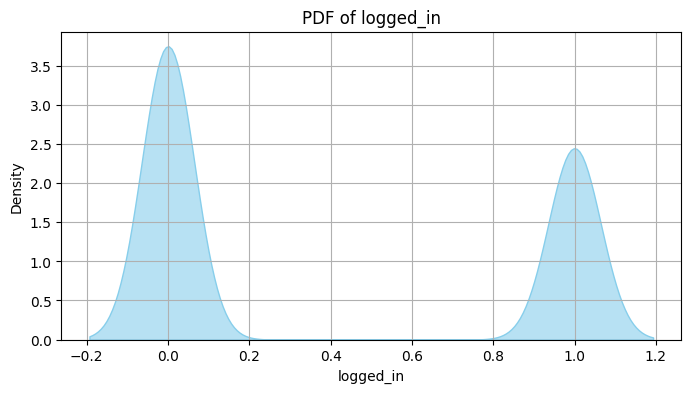

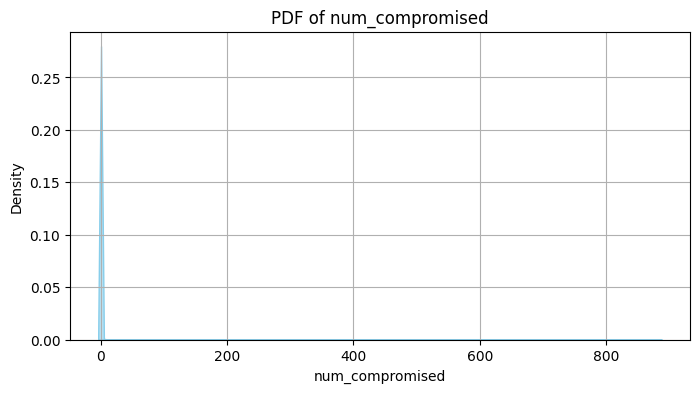

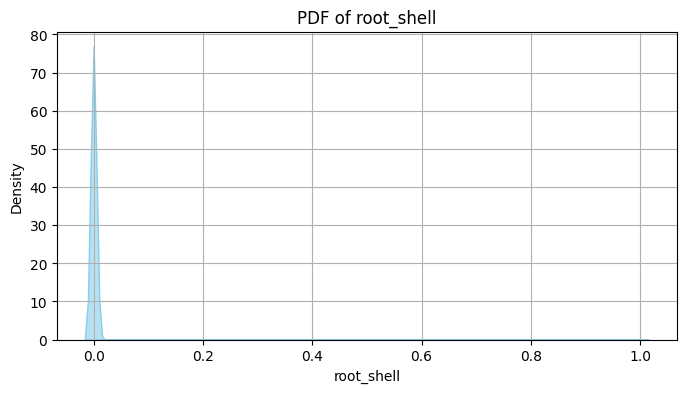

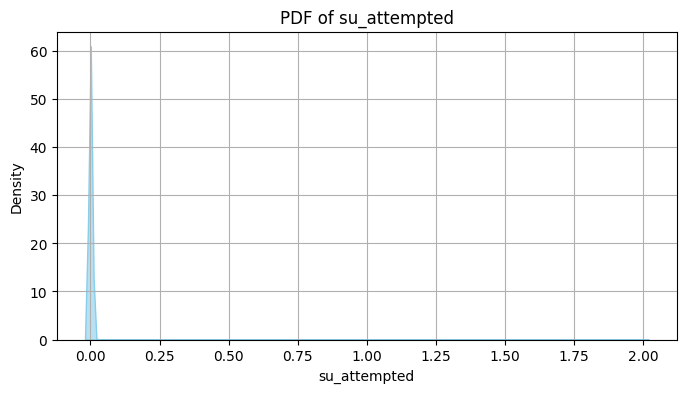

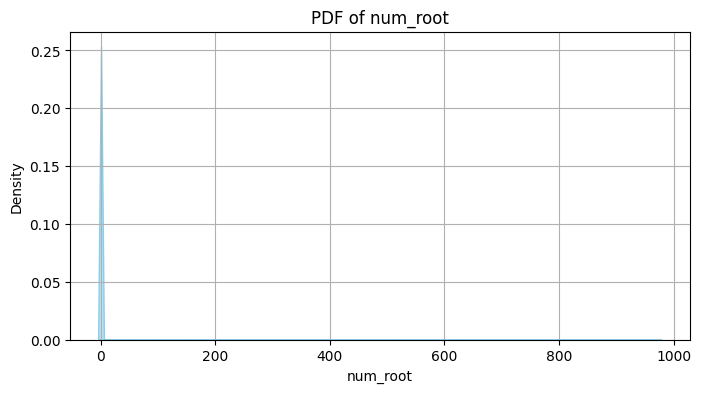

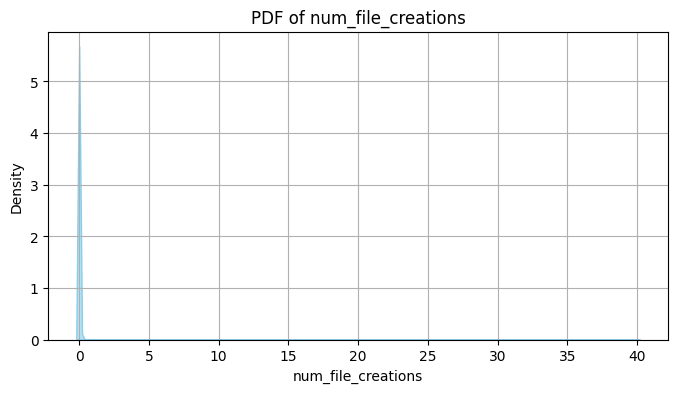

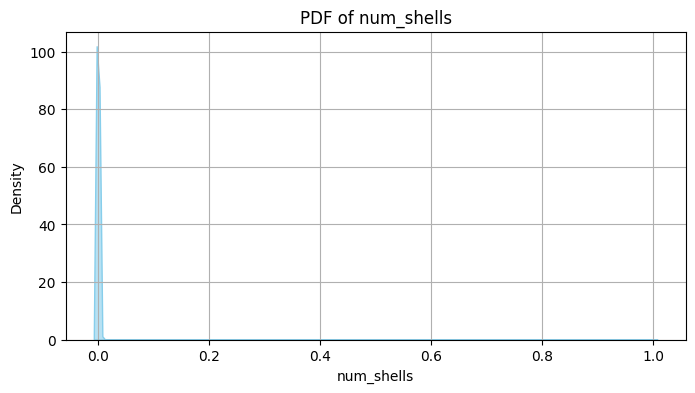

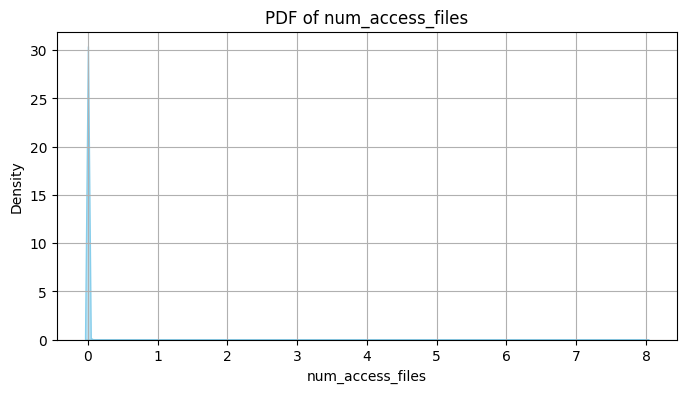

C:\Users\Admin\AppData\Local\Temp\ipykernel_11284\564808671.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[column], fill=True, color='skyblue', alpha=0.6)


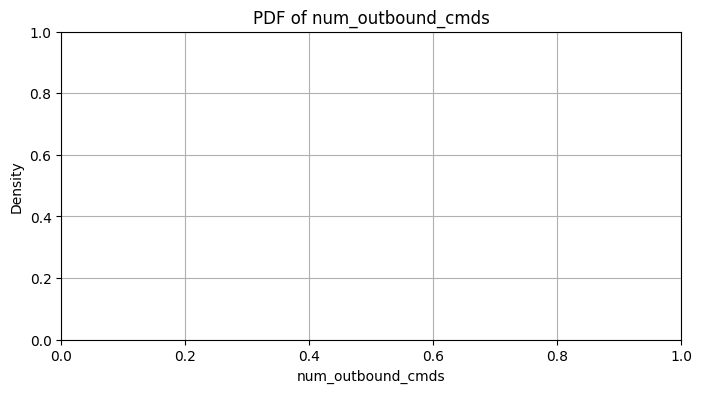

C:\Users\Admin\AppData\Local\Temp\ipykernel_11284\564808671.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[column], fill=True, color='skyblue', alpha=0.6)


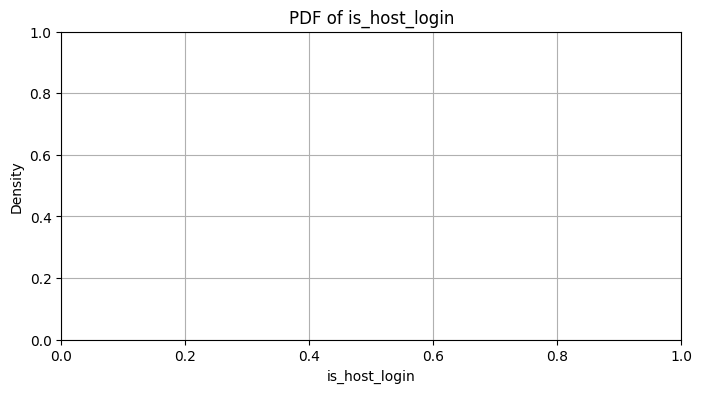

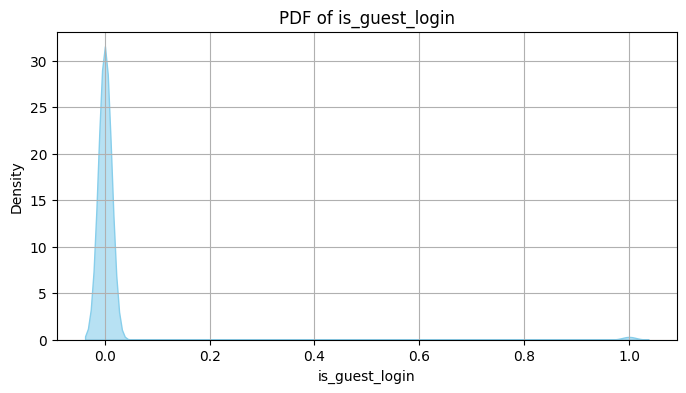

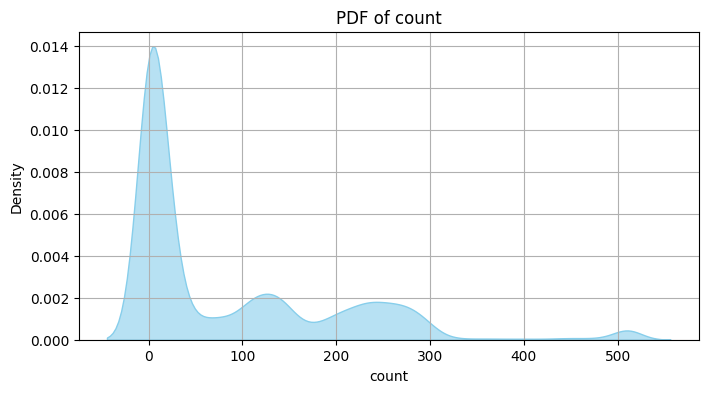

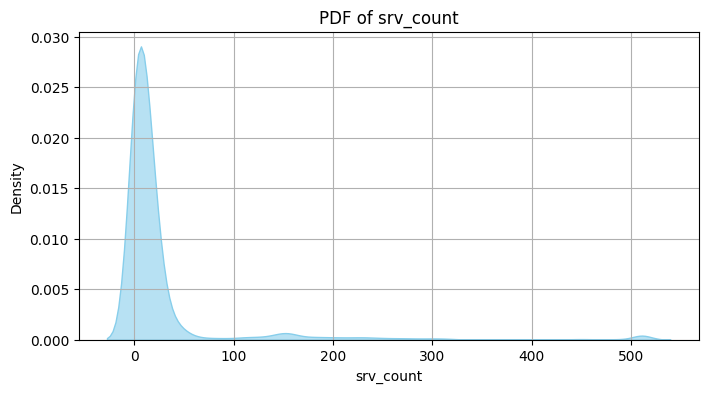

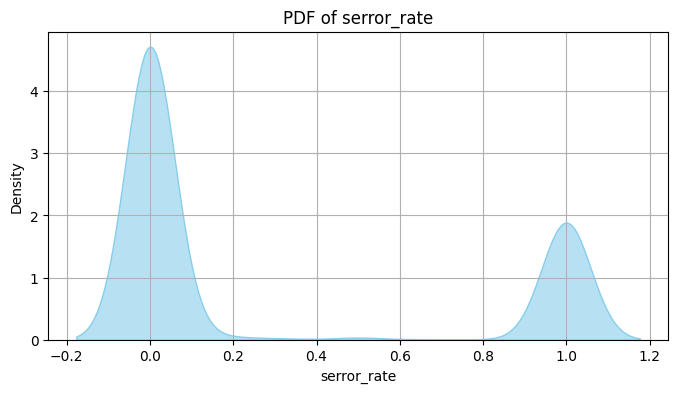

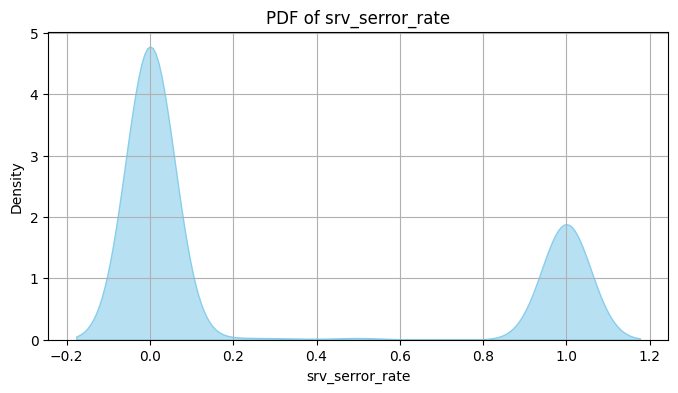

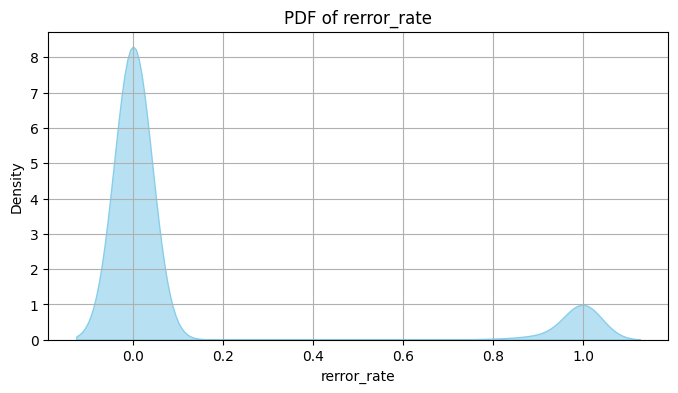

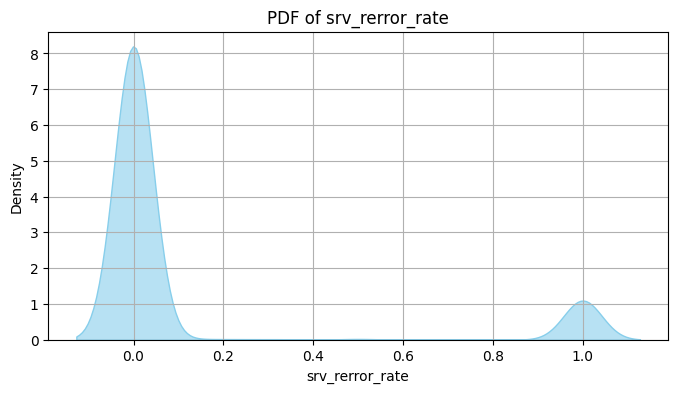

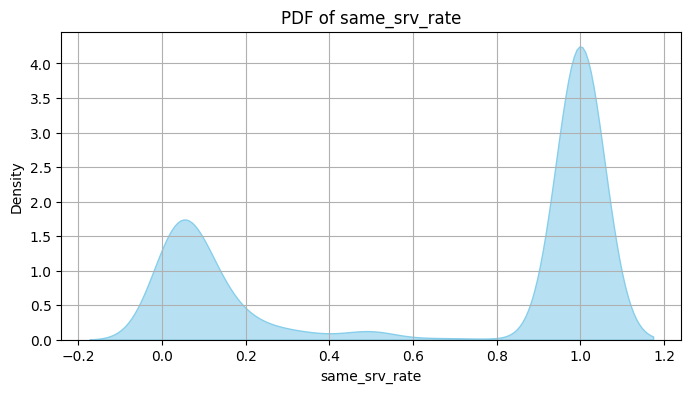

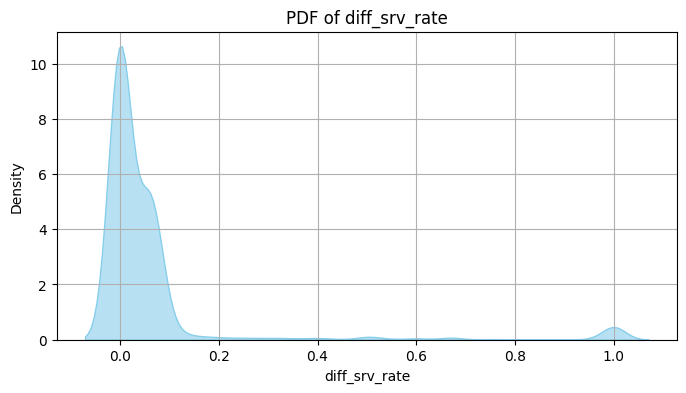

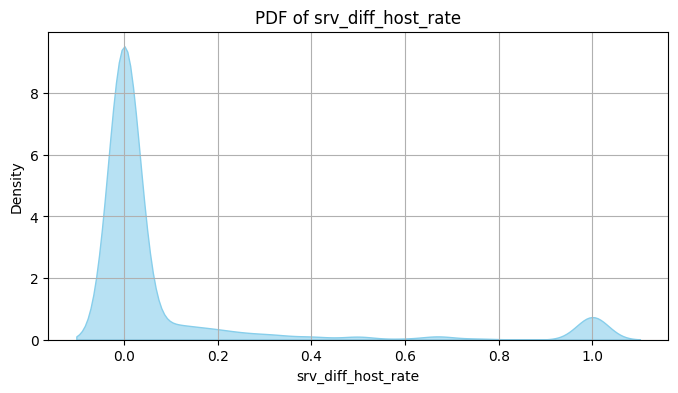

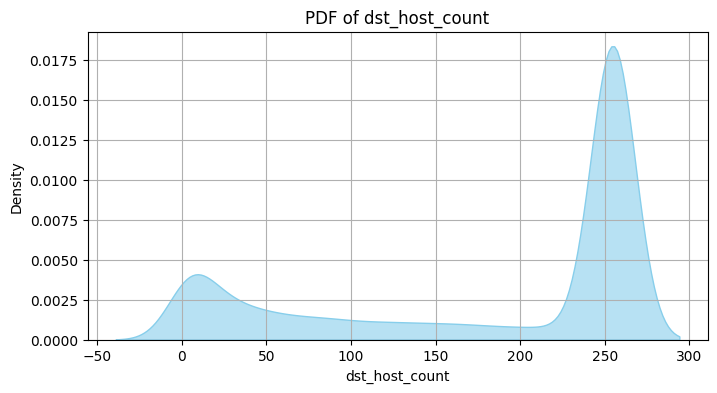

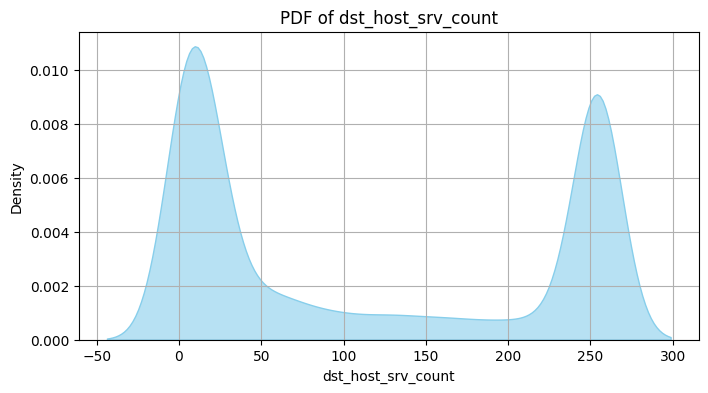

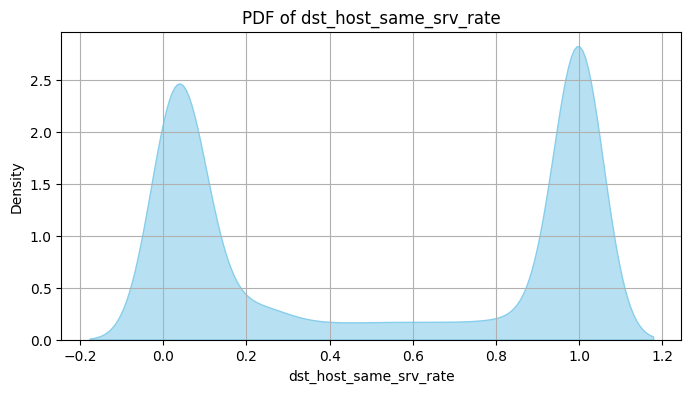

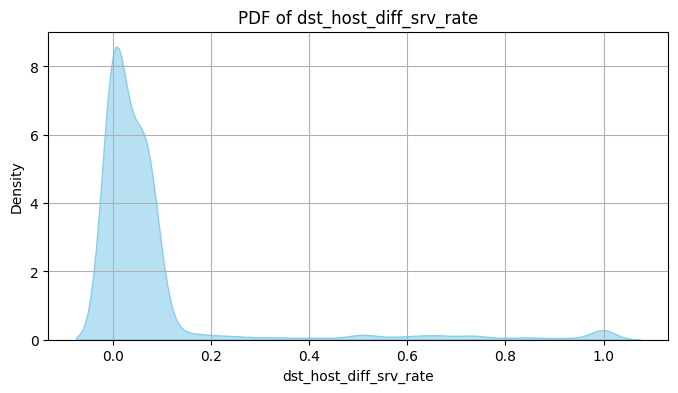

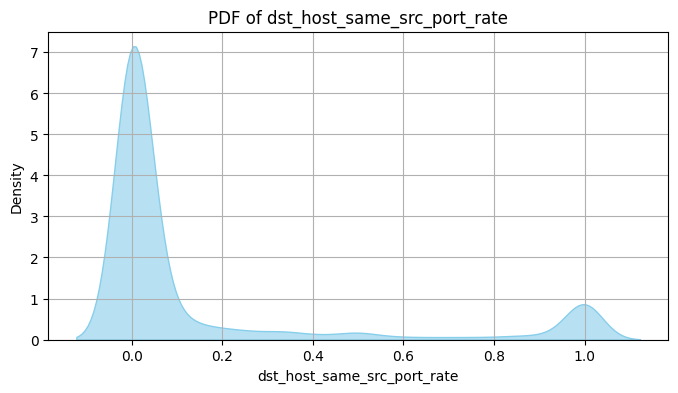

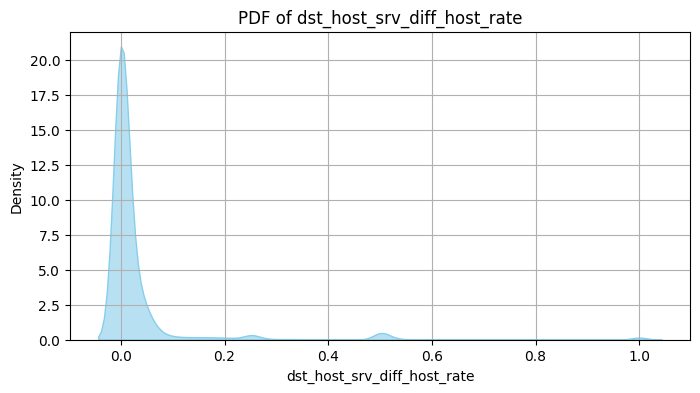

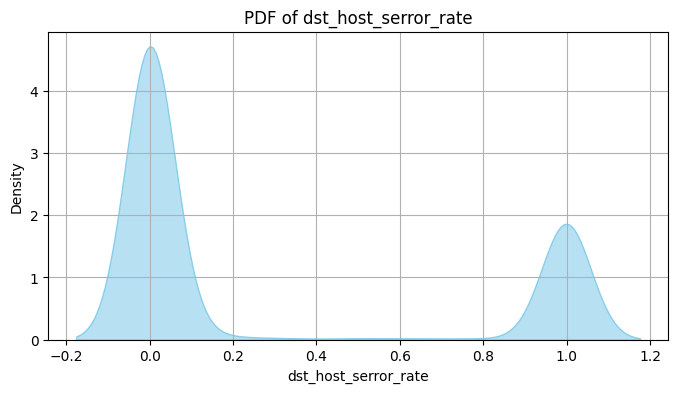

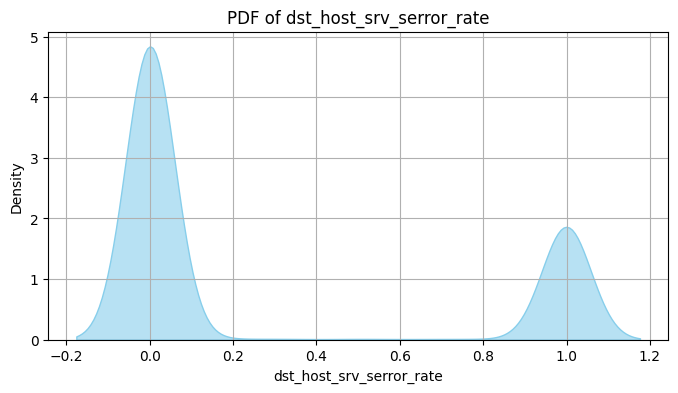

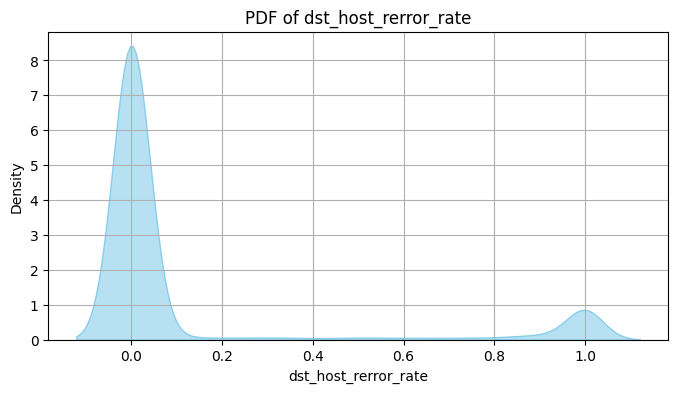

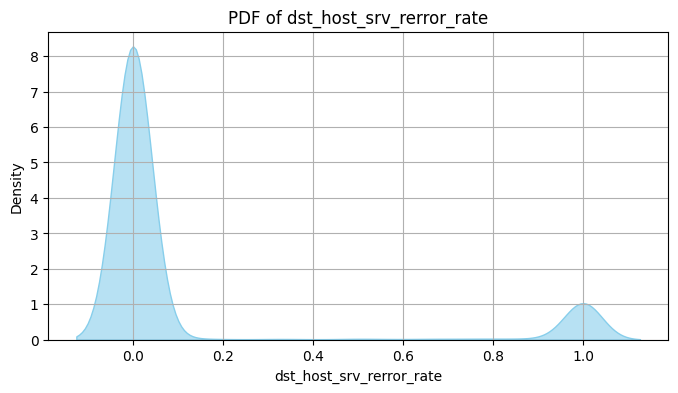

<Figure size 800x400 with 0 Axes>

In [ ]:
def plot_pdf_pmf_for_columns(df):
    for column in df.columns:
        plt.figure(figsize=(8, 4))
        if df[column].dtype == 'object' or df[column].dtype.name == 'category':
            # Calculate PMF for discrete data
            pmf = df[column].value_counts(normalize=True)
            pmf.plot(kind='bar', color='skyblue')
            plt.title(f'PMF of {column}')
            plt.xlabel(column)
            plt.ylabel('Probability')
            plt.xticks(rotation=90)
        else:
            # Calculate PDF for continuous data
            sns.kdeplot(df[column], fill=True, color='skyblue', alpha=0.6)
            plt.title(f'PDF of {column}')
            plt.xlabel(column)
            plt.ylabel('Density')
        
        plt.grid()
        plt.show()

plot_pdf_pmf_for_columns(df)

# Step 4: Calculate and draw the CDF for each field 

CDF for every field 
we loop on each column using the (for column in df.columns:)
we evaluate the CDF and CMF for the contious and the discrete data respectively
Using the seaborn library we can use the functions sns.histplot() and sns.ecdfplot() to plot the CDFs for dicrete and contionous columns of data

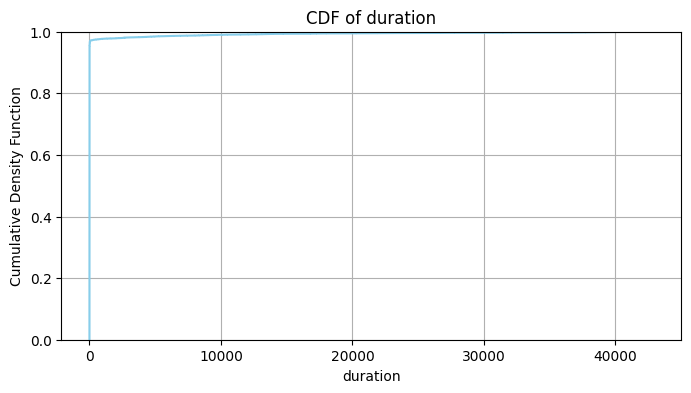

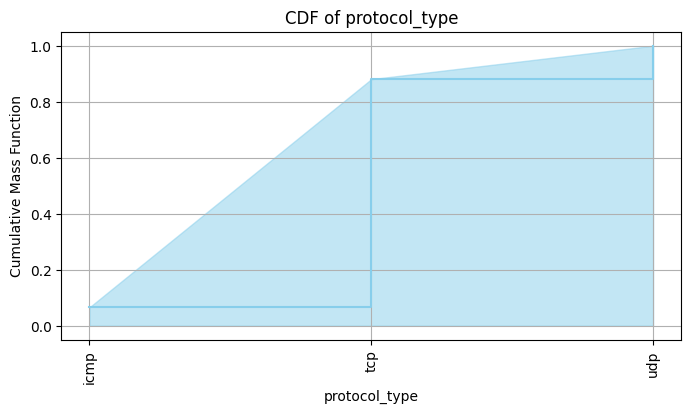

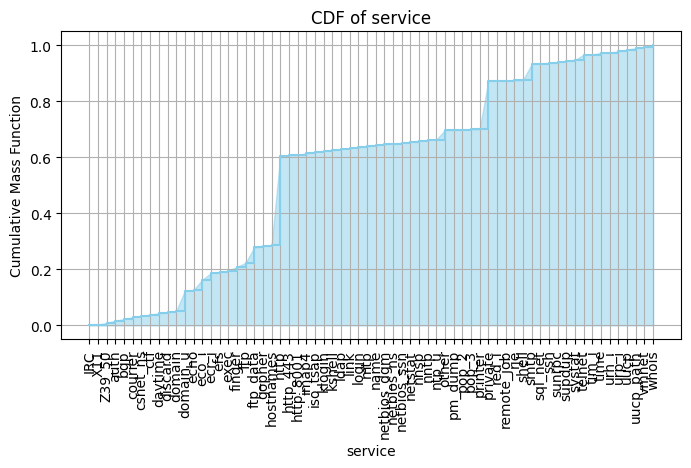

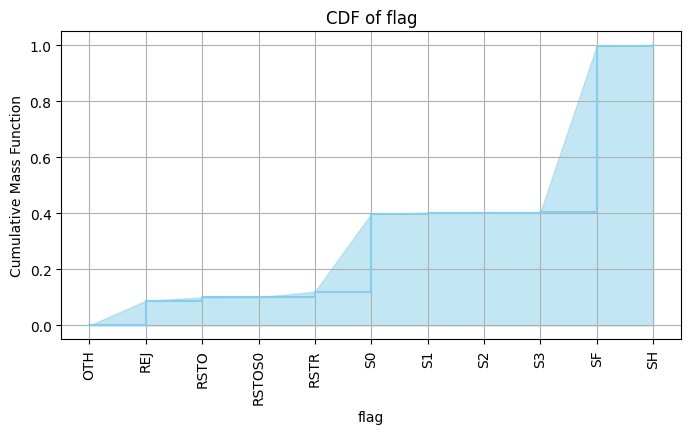

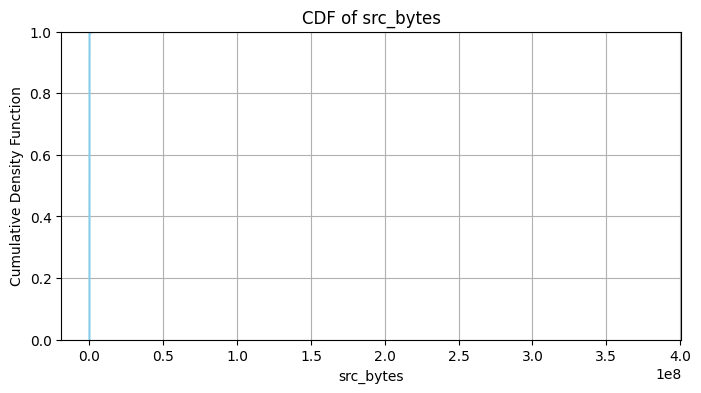

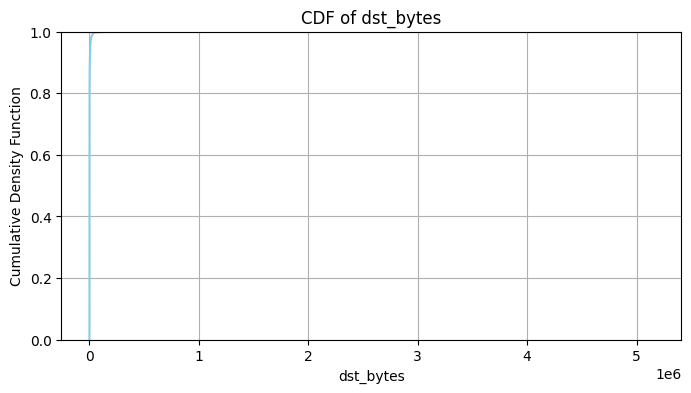

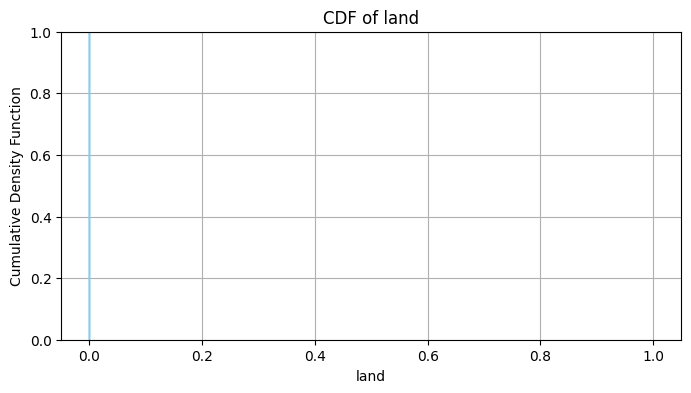

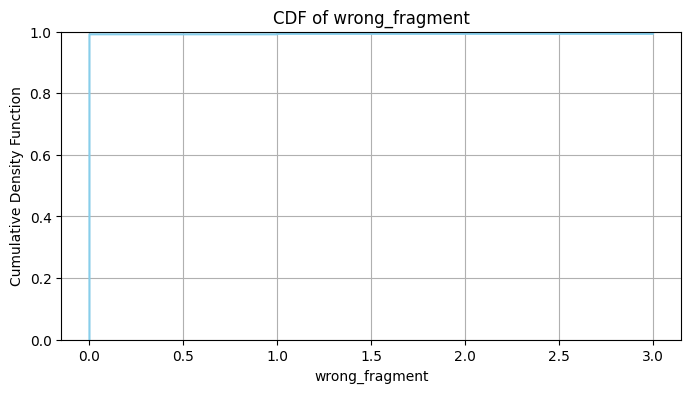

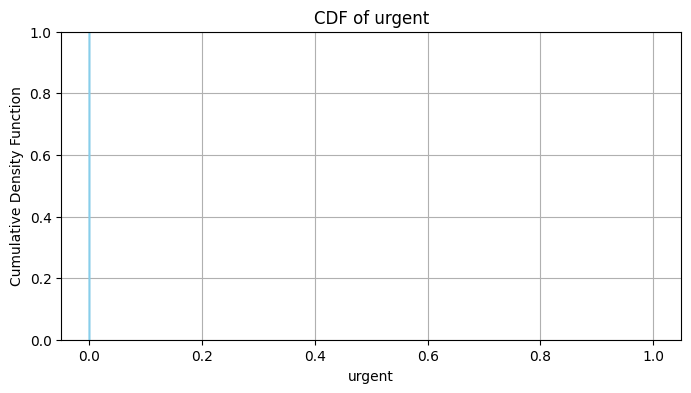

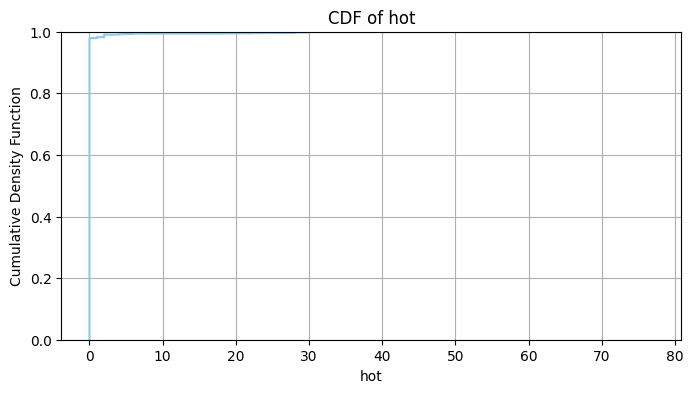

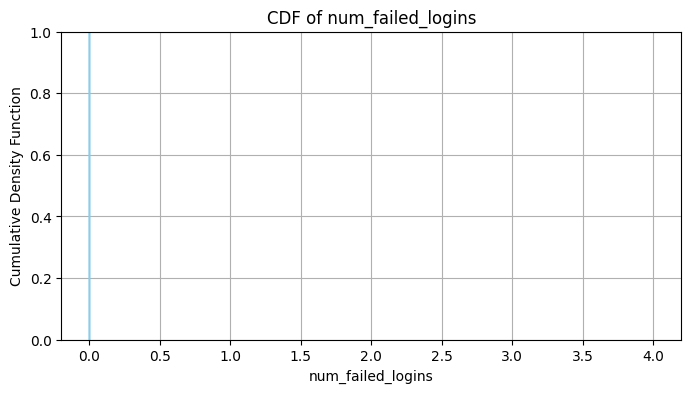

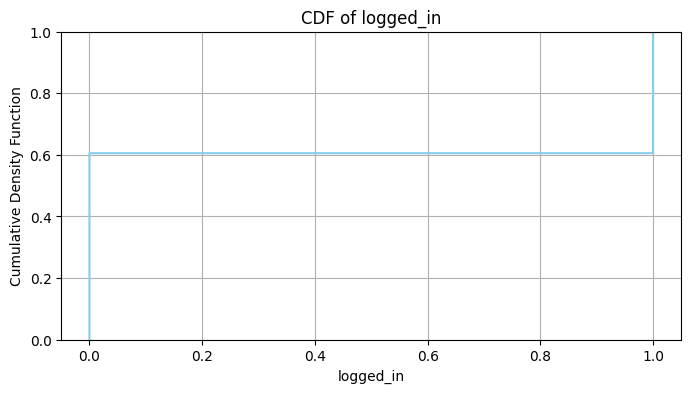

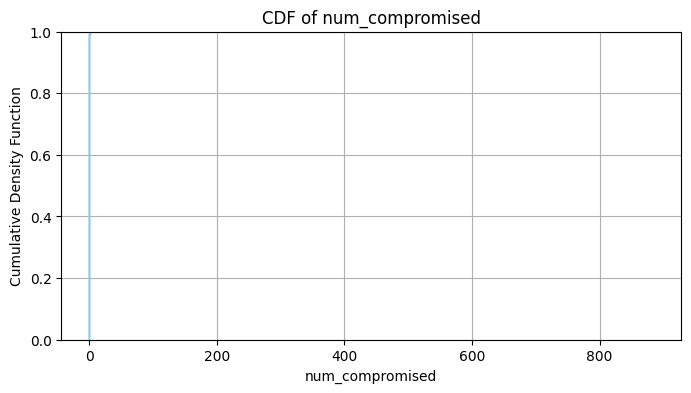

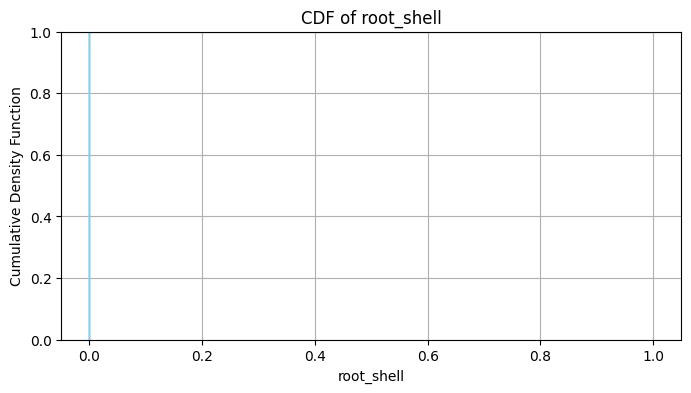

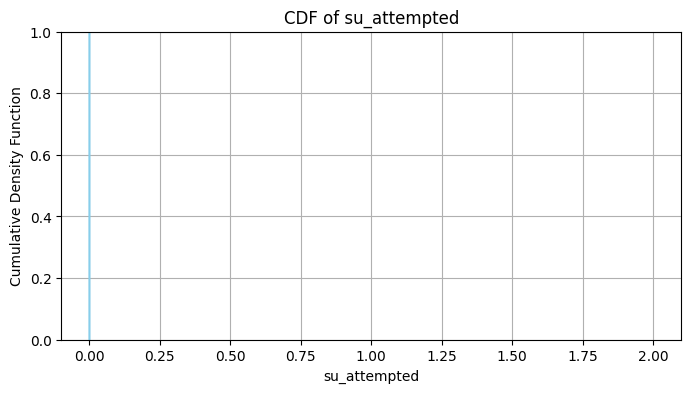

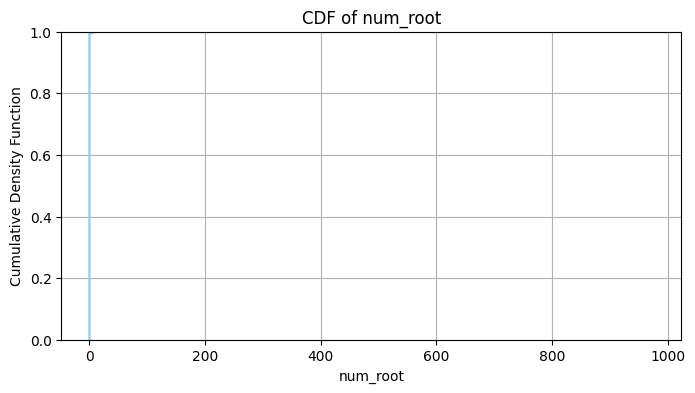

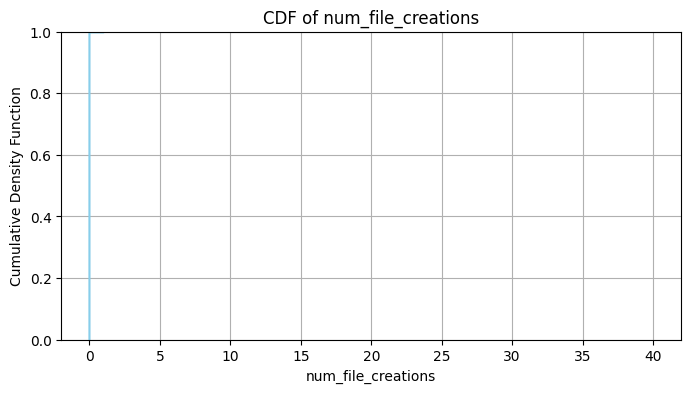

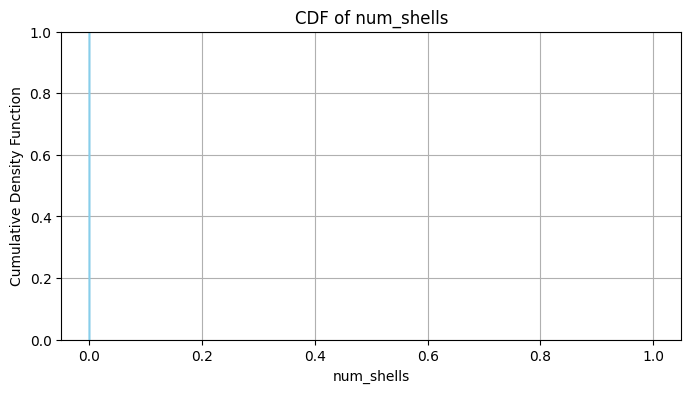

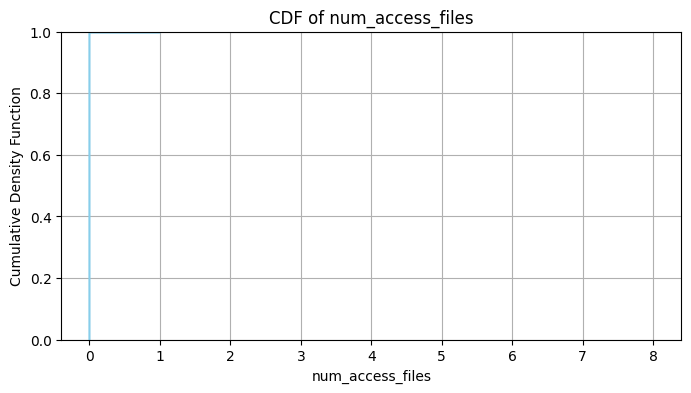

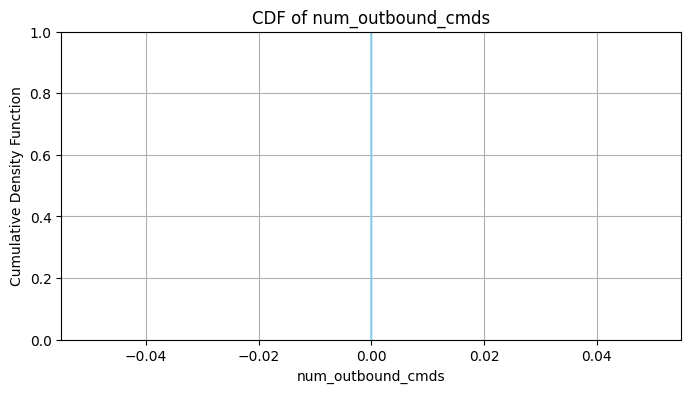

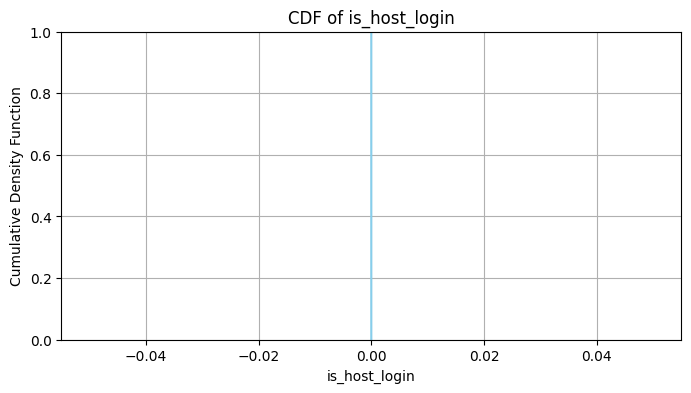

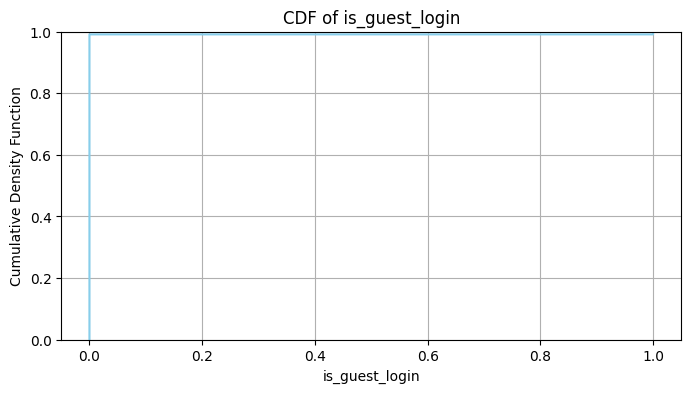

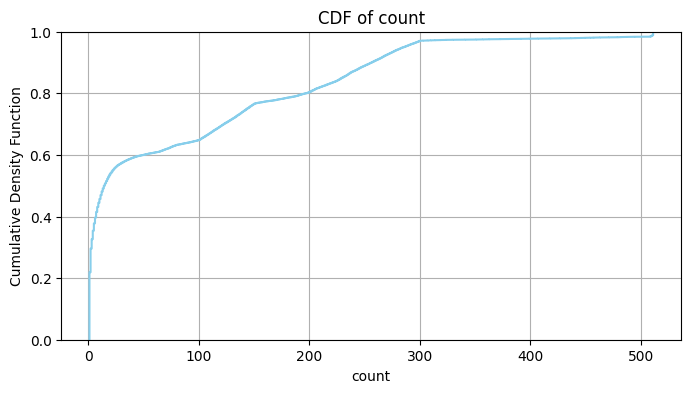

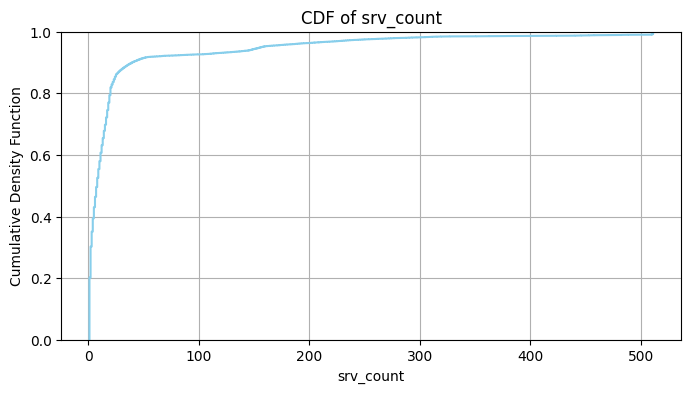

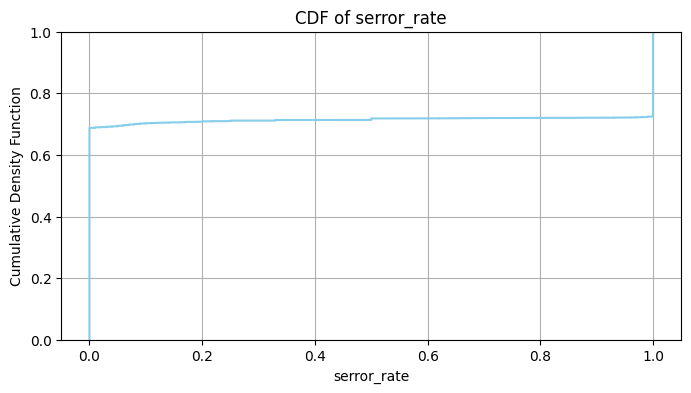

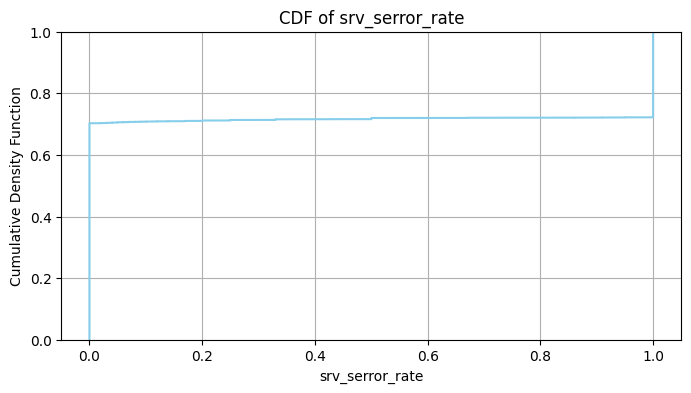

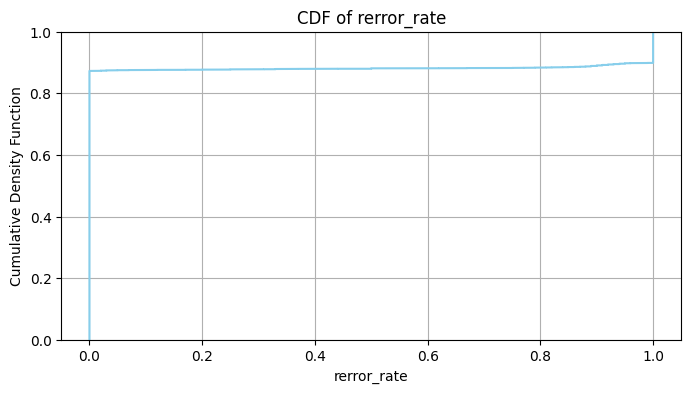

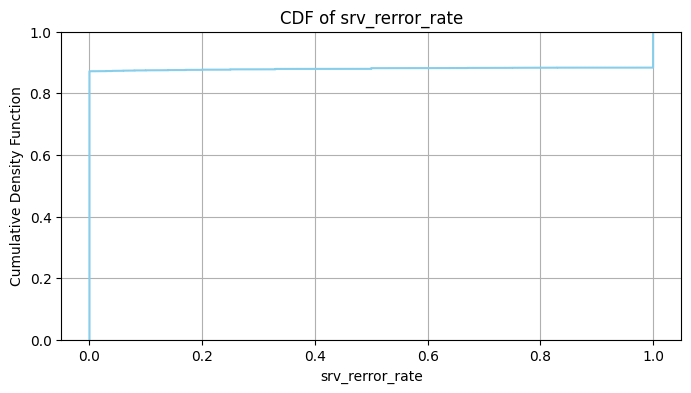

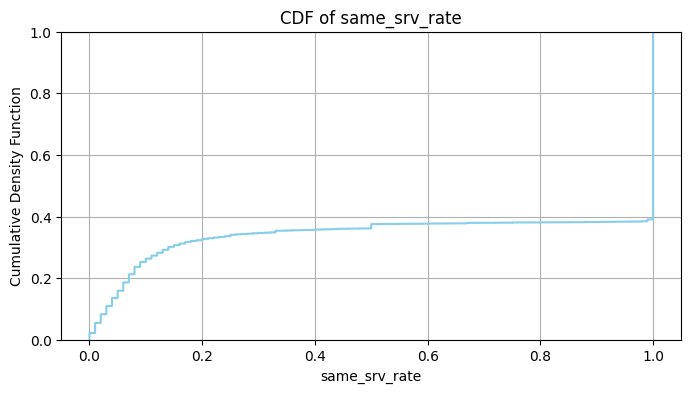

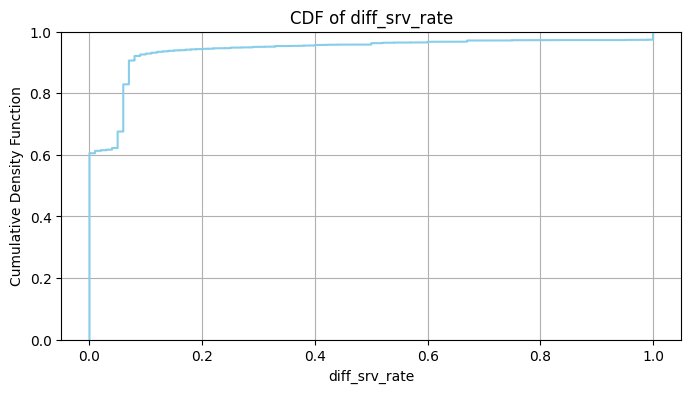

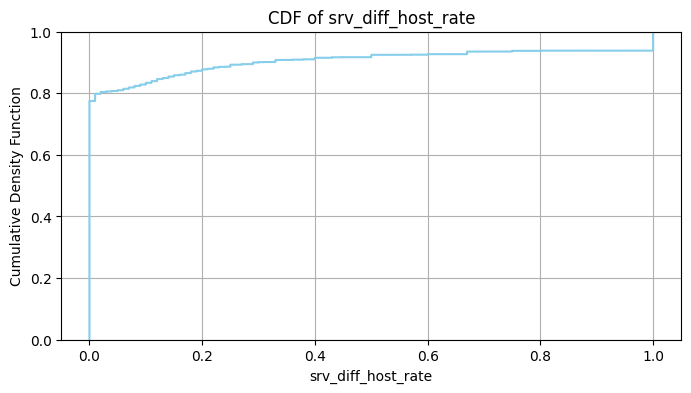

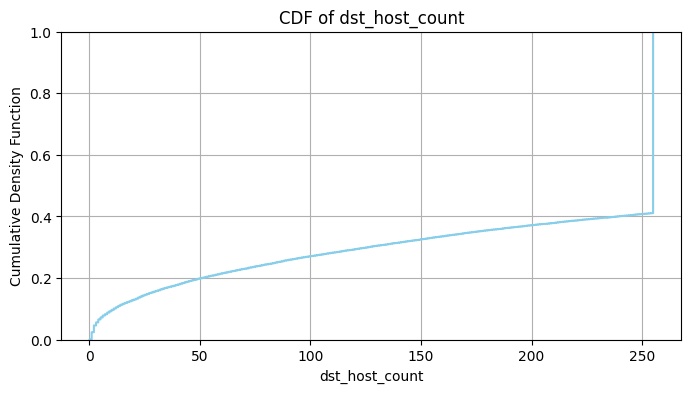

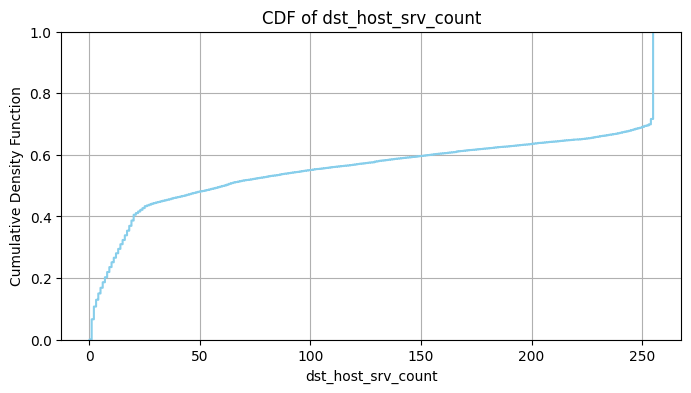

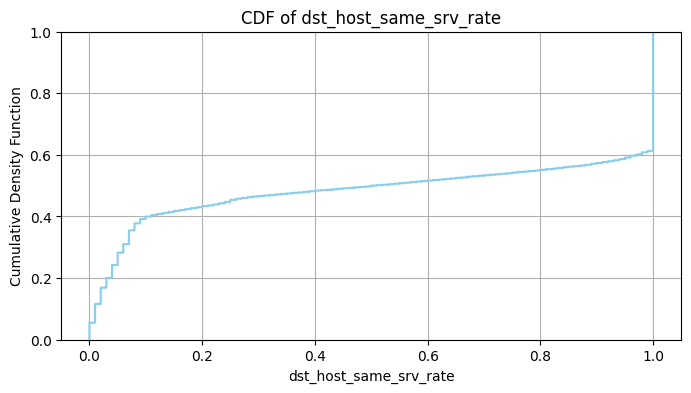

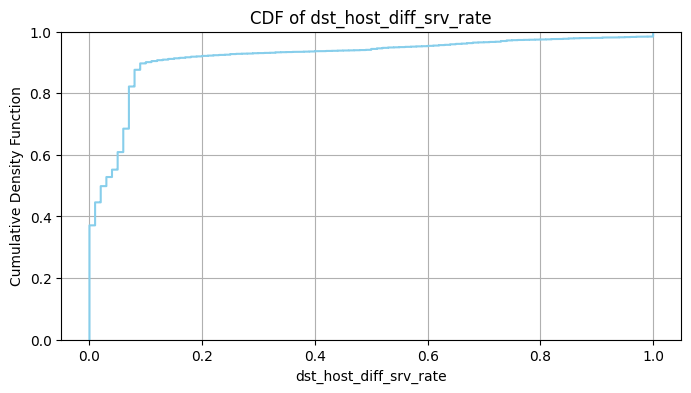

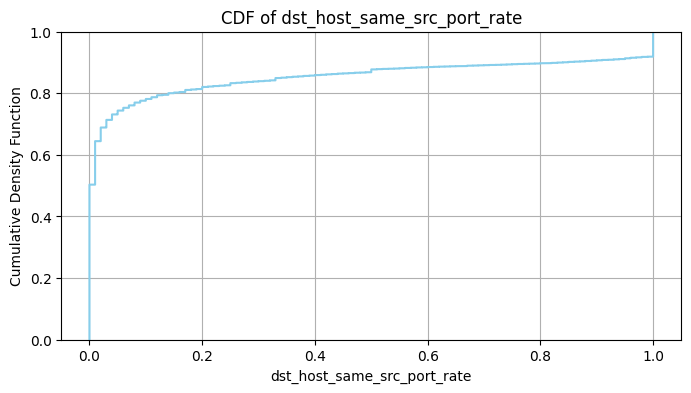

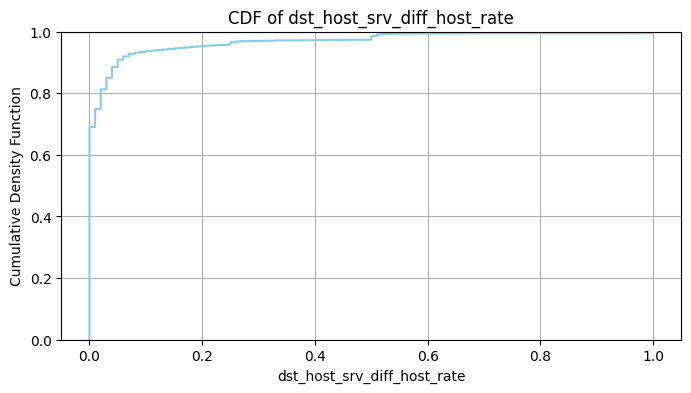

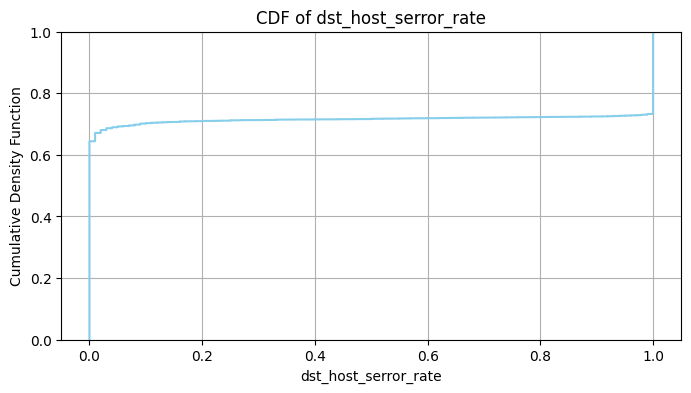

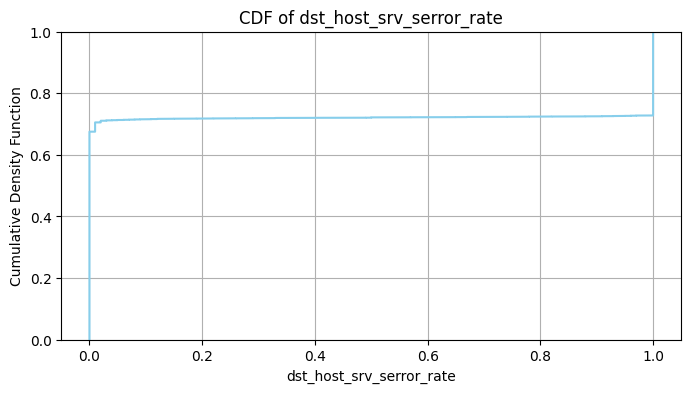

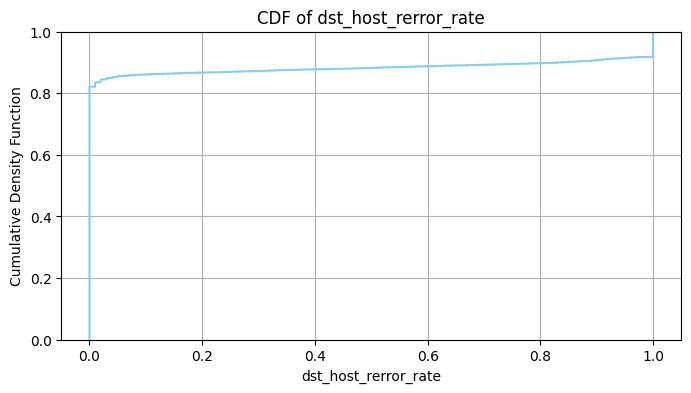

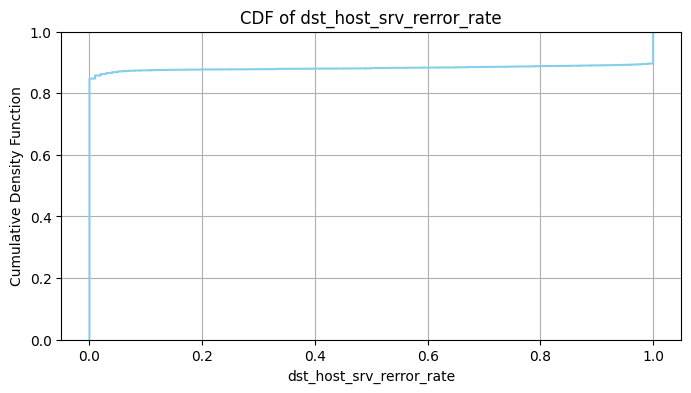

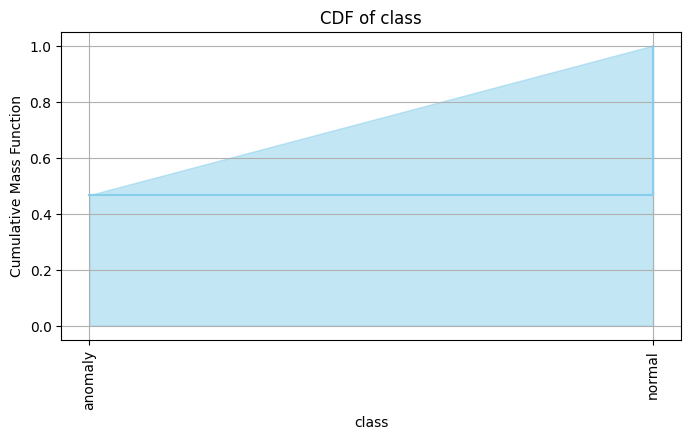

In [ ]:
def plot_cdf_for_columns(df):
    for column in df.columns:
        plt.figure(figsize=(8, 4))
        
        if df[column].dtype == 'object' or df[column].dtype.name == 'category':
             # Plot CDF for discrete data
            counts = df[column].value_counts().sort_index()  # Get counts of each category
            cdf = counts.cumsum() / counts.sum()  # Calculate the cumulative distribution

            # Create a step plot for the CDF
            plt.step(cdf.index, cdf.values, where='post', color='skyblue', label='CDF')
            plt.fill_between(cdf.index, cdf.values, color='skyblue', alpha=0.5)  # Optional: fill under the curve
            plt.title(f'CDF of {column}')
            plt.xticks(rotation=90)
            plt.xlabel(column)
            plt.ylabel('Cumulative Mass Function')
            
        
        else:
            # Plot CDF for continuous data
            sns.ecdfplot(df[column], color='skyblue')
            plt.title(f'CDF of {column}')
            plt.xlabel(column)
            plt.ylabel('Cumulative Density Function')
        
        plt.grid()
        plt.show()

plot_cdf_for_columns(df)


# Step 5: Calculate the PMF/PDF given the attack type


Calculating the Conditional Pdf accroding to the class type we filter the data frame by having the rows where the class type is normal 
also handling the casese e where the class type is normal and anomaly
Since we need to show every original column pdf with its condional one we cant just call the 2 oher functions so we need to rewrite them in a new method so we can make sure that every loop prints the 3 pdfs together 
Also, We use the arguments normal_rows = df[df['class'] == "normal"] and anomaly_rows = df[df['class'] == "anomaly"] so we can create new data framews with the rows that contain normal and anomaly respectively

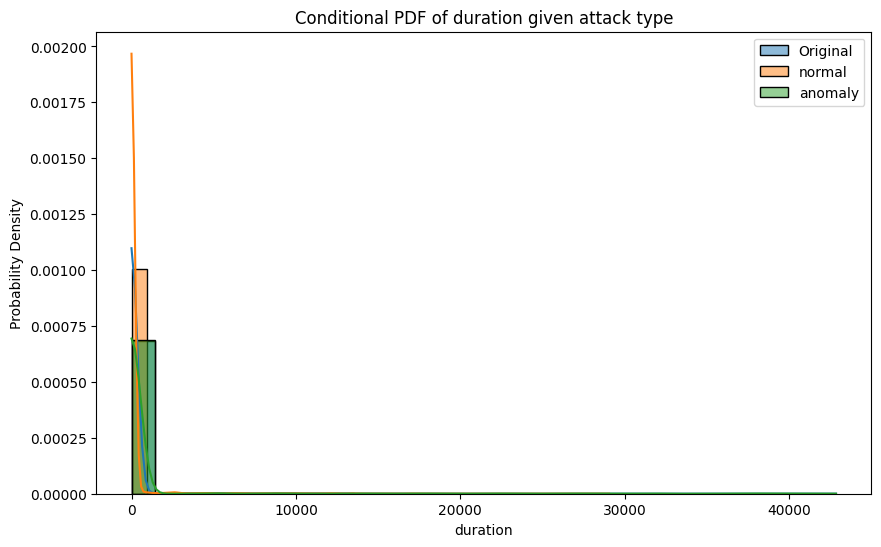

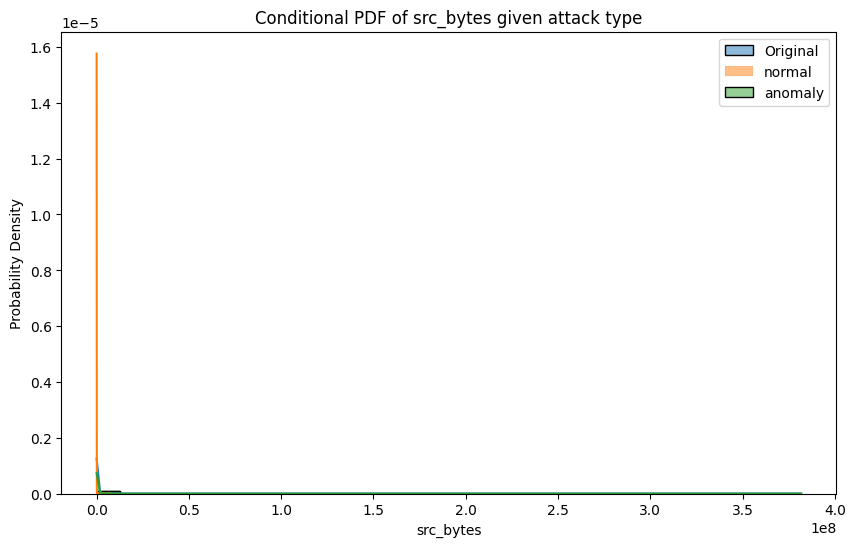

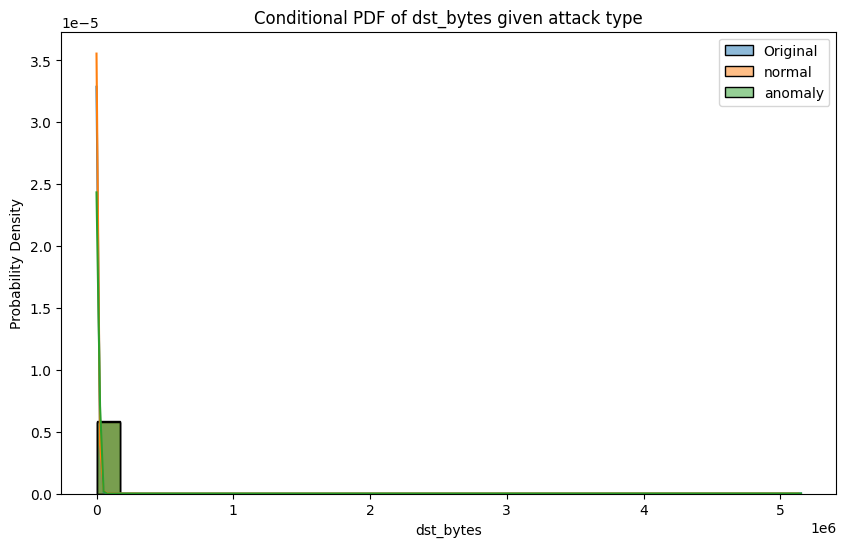

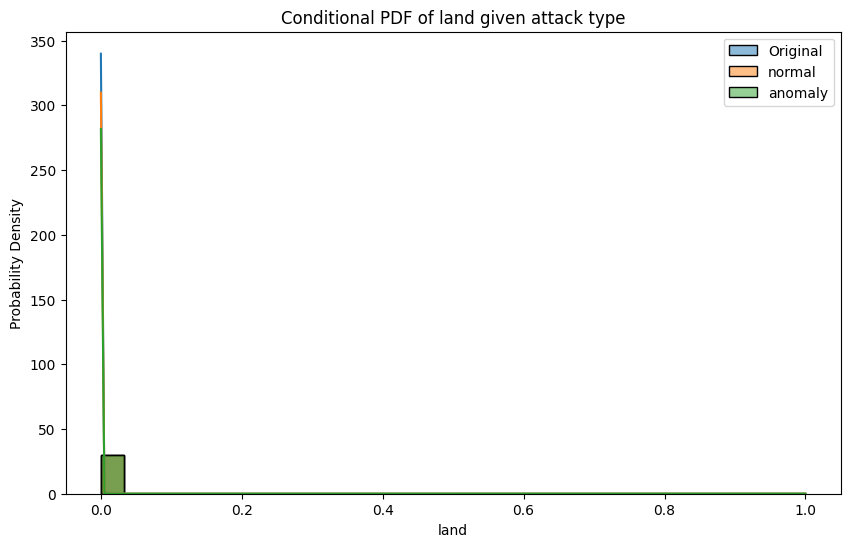

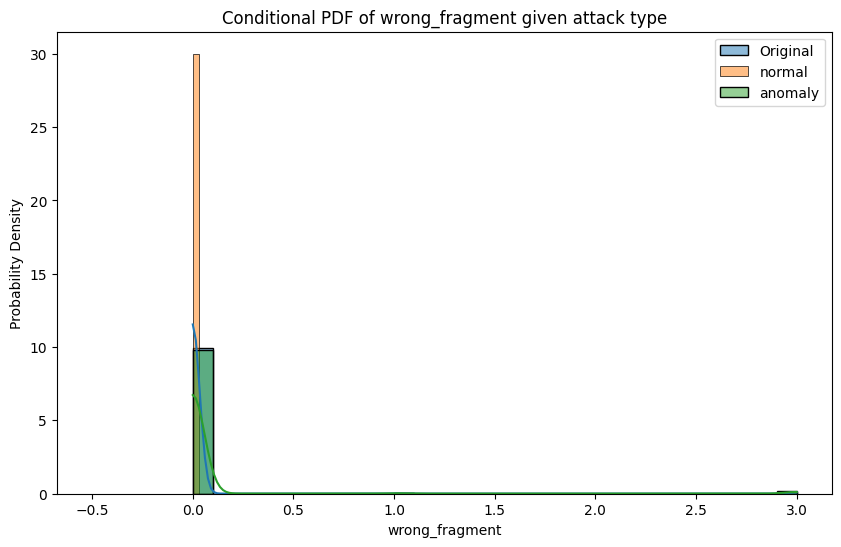

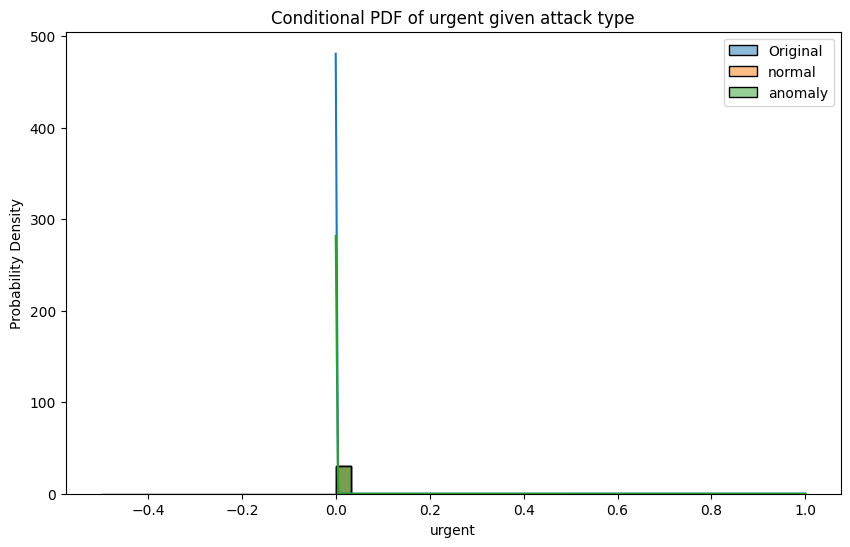

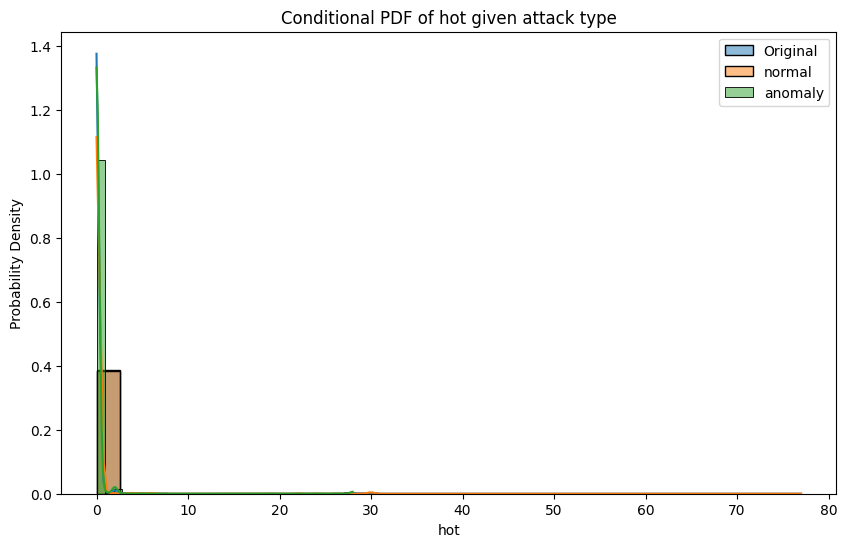

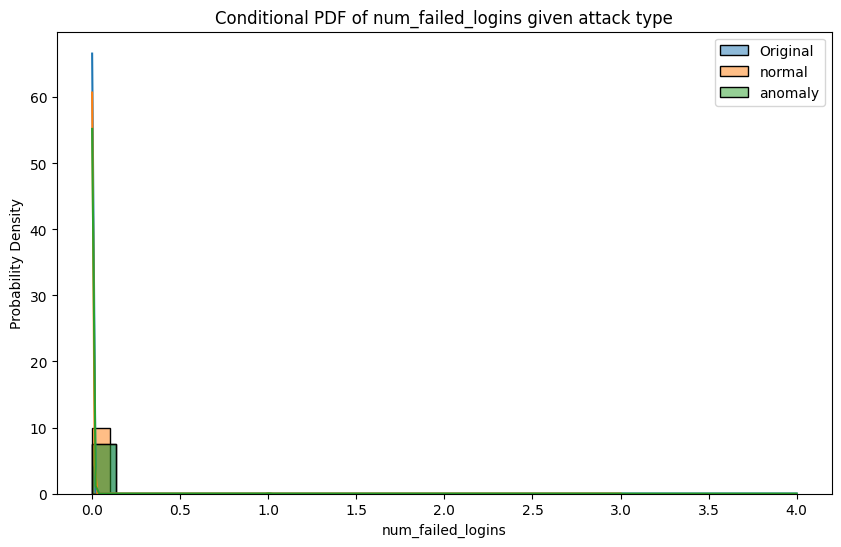

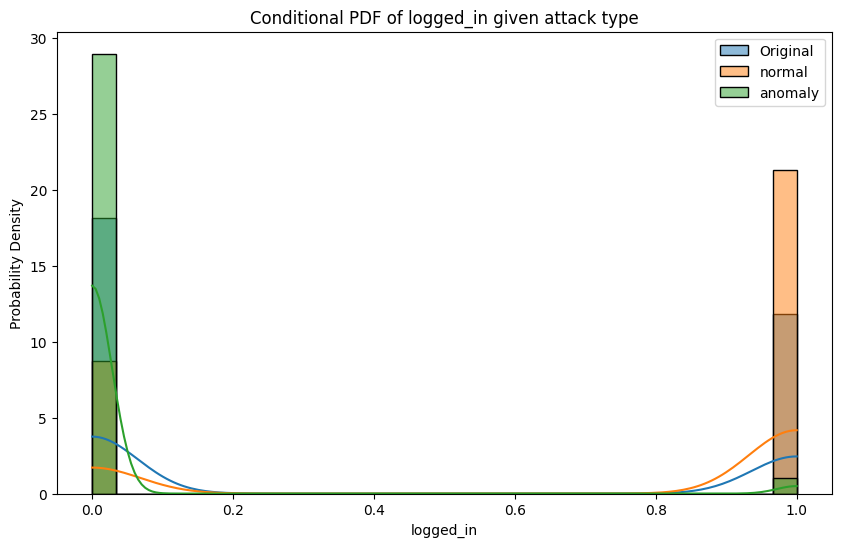

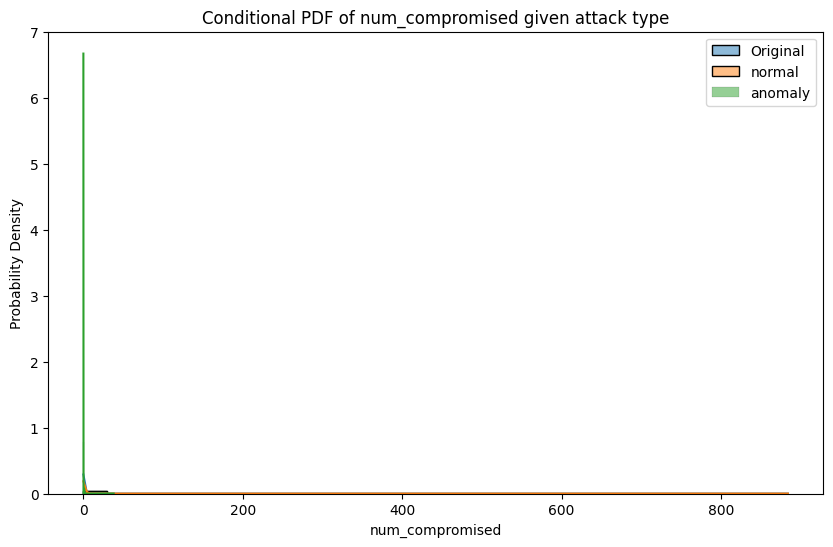

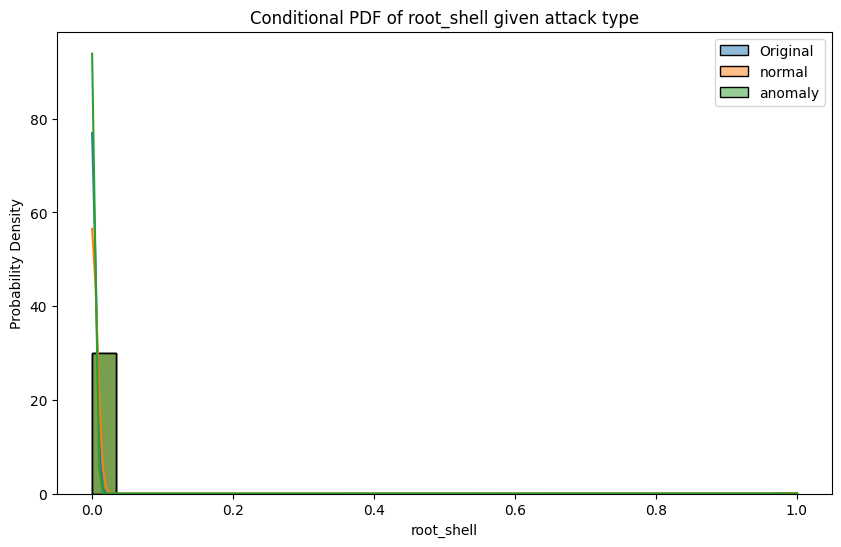

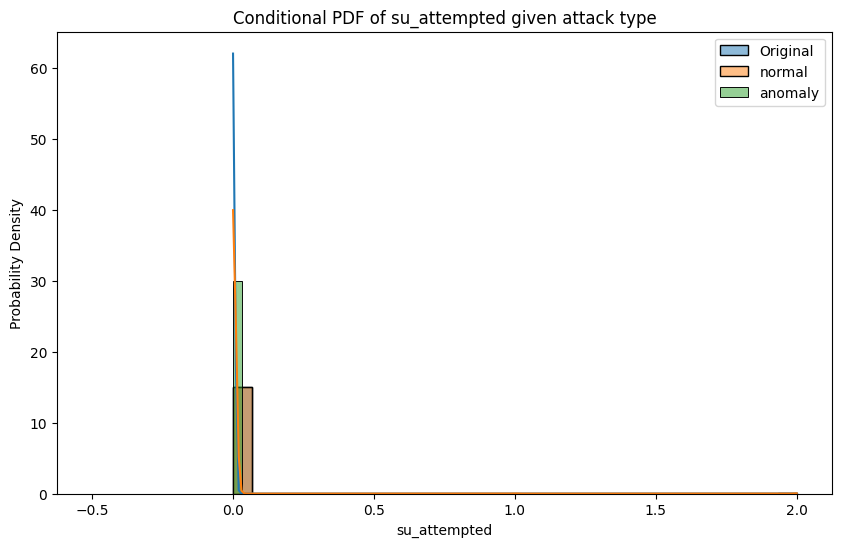

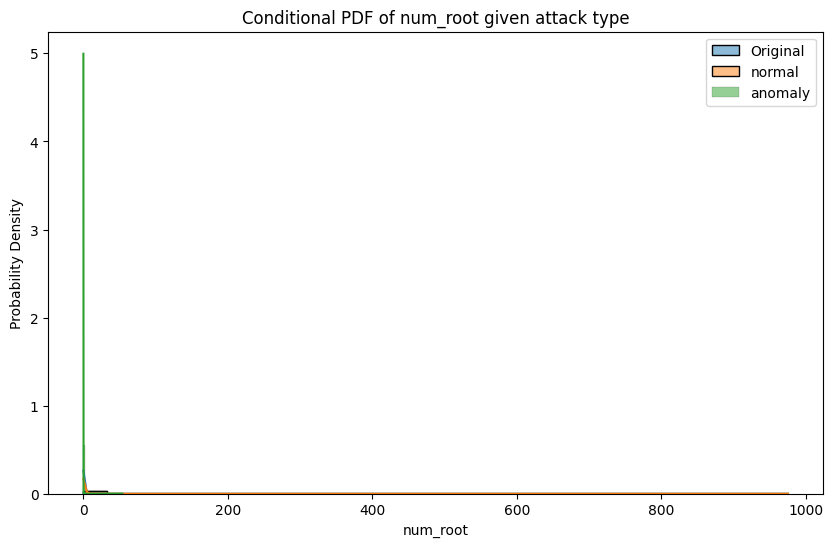

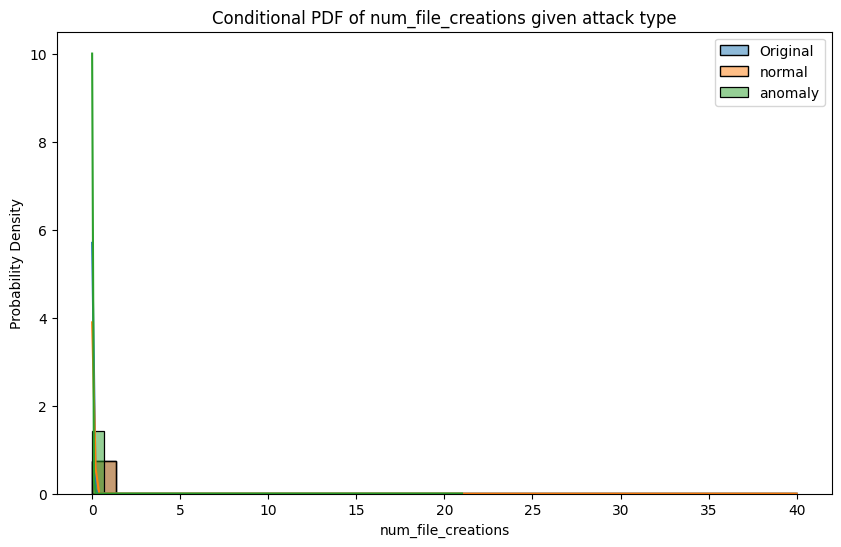

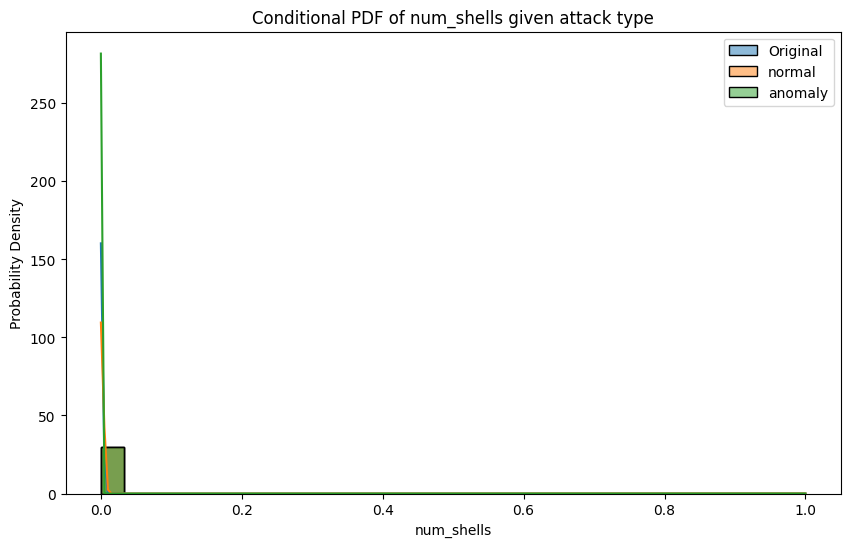

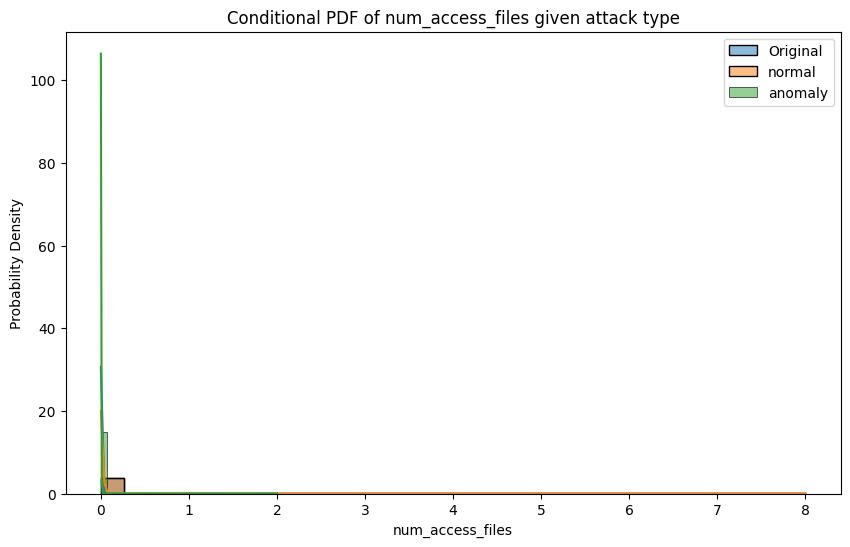

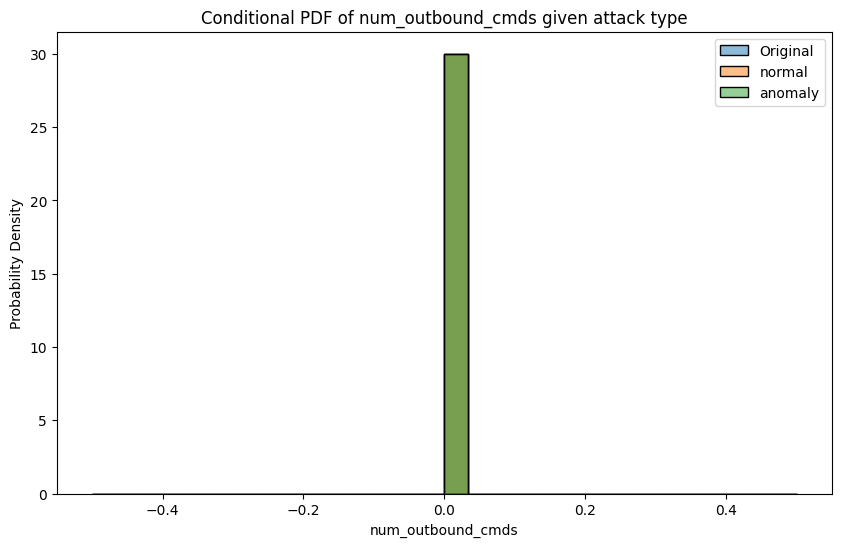

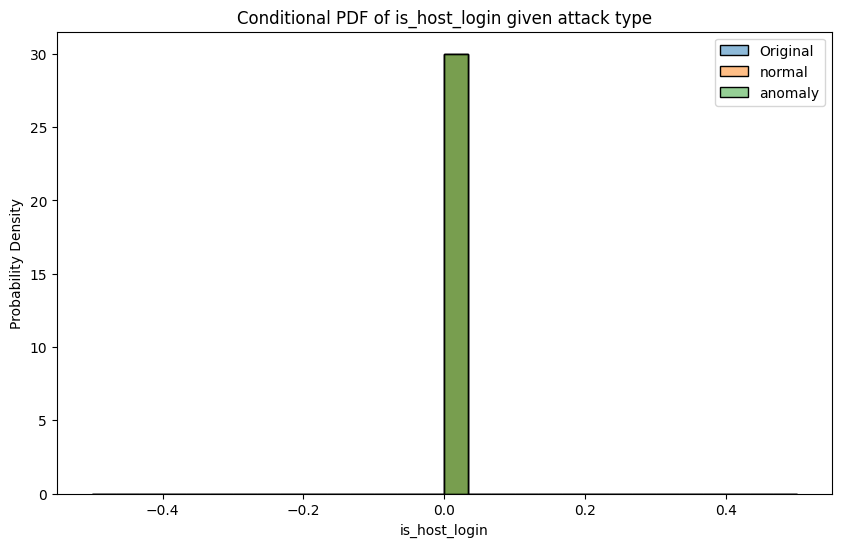

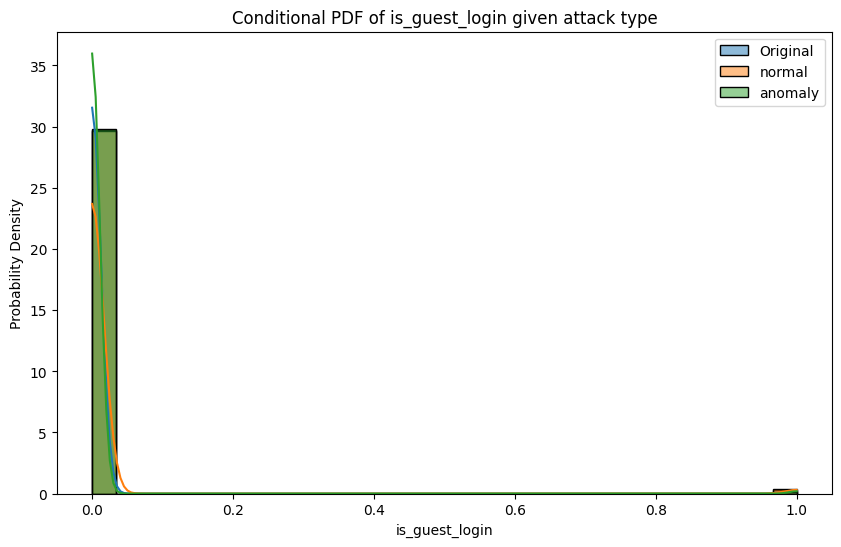

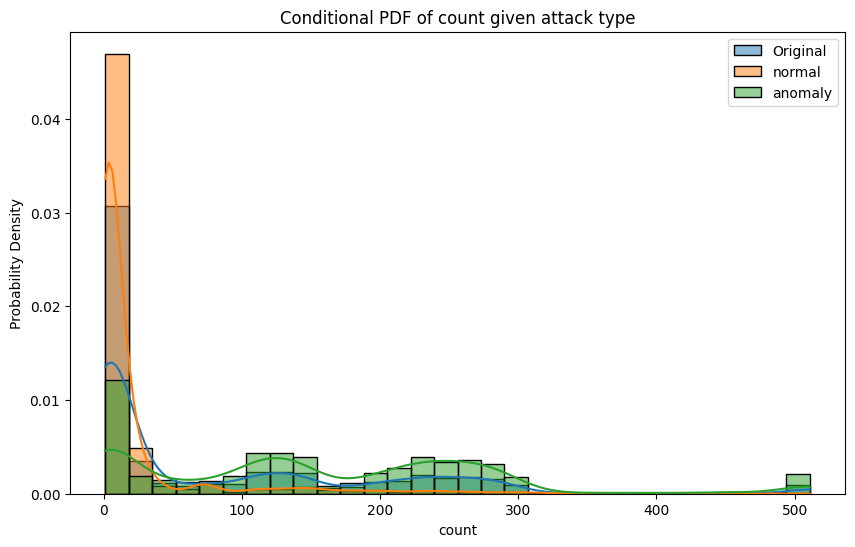

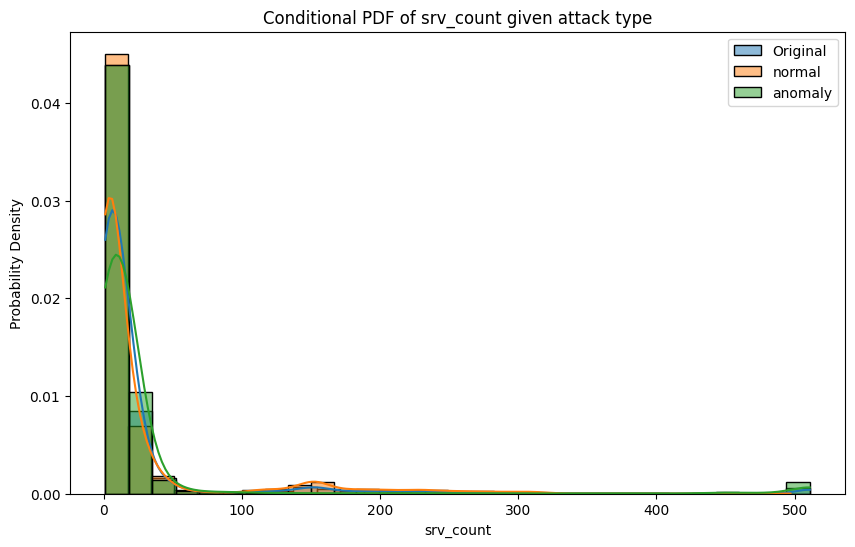

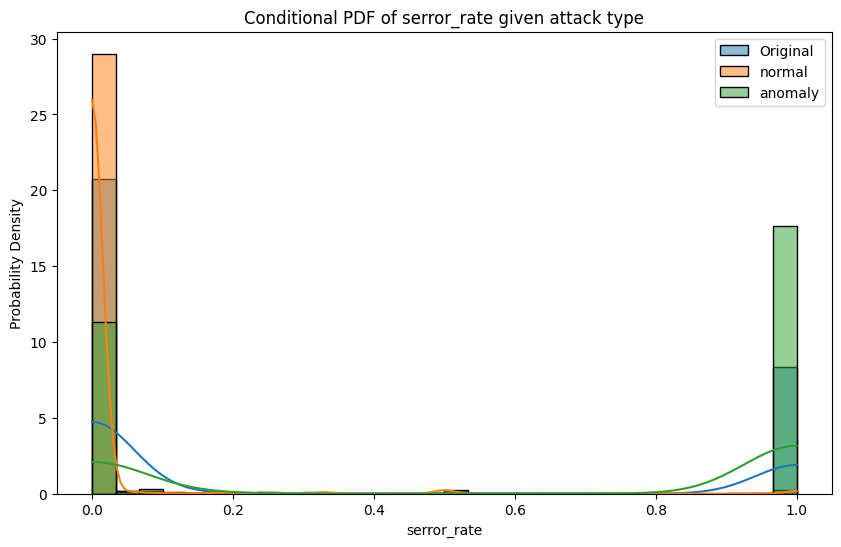

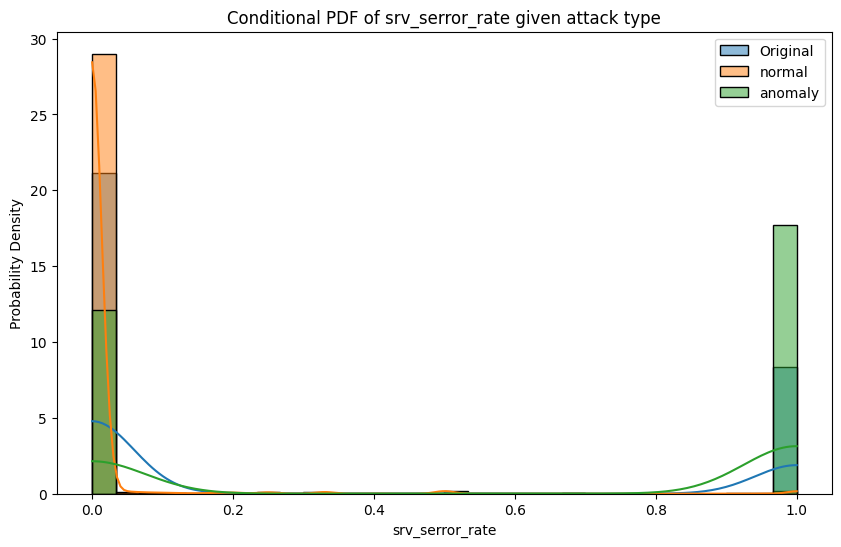

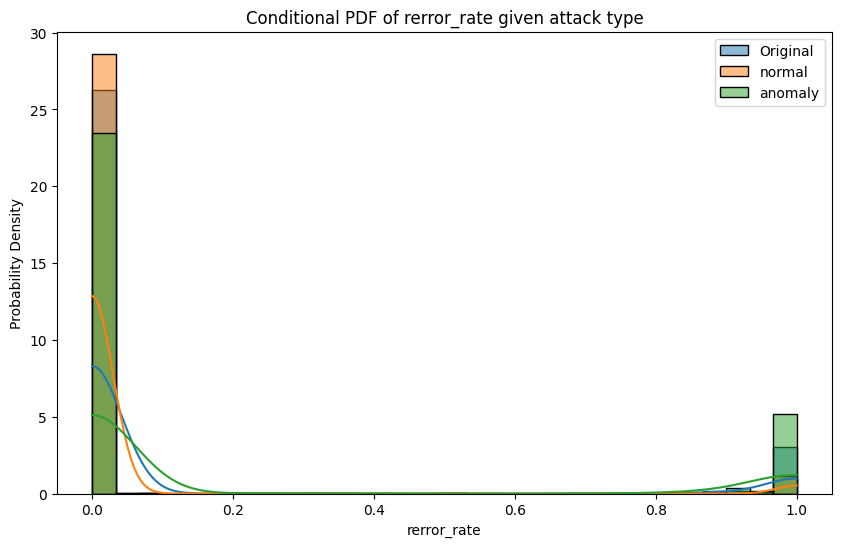

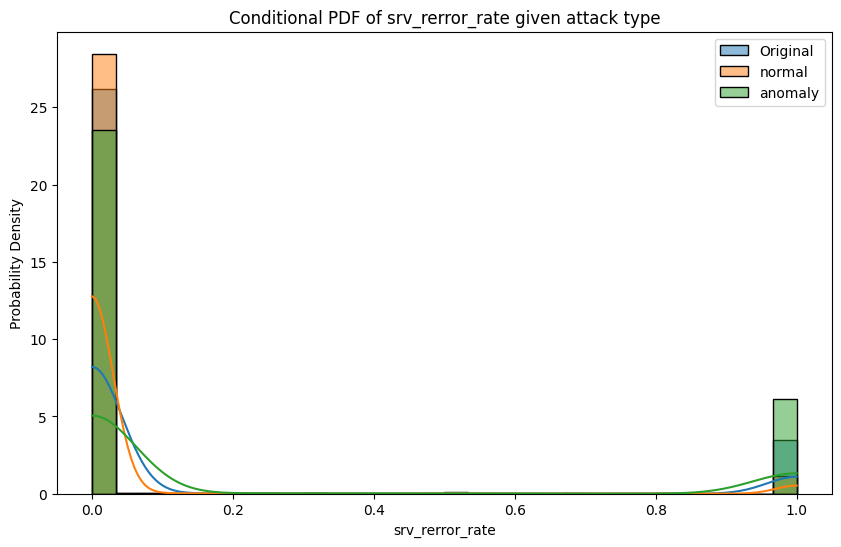

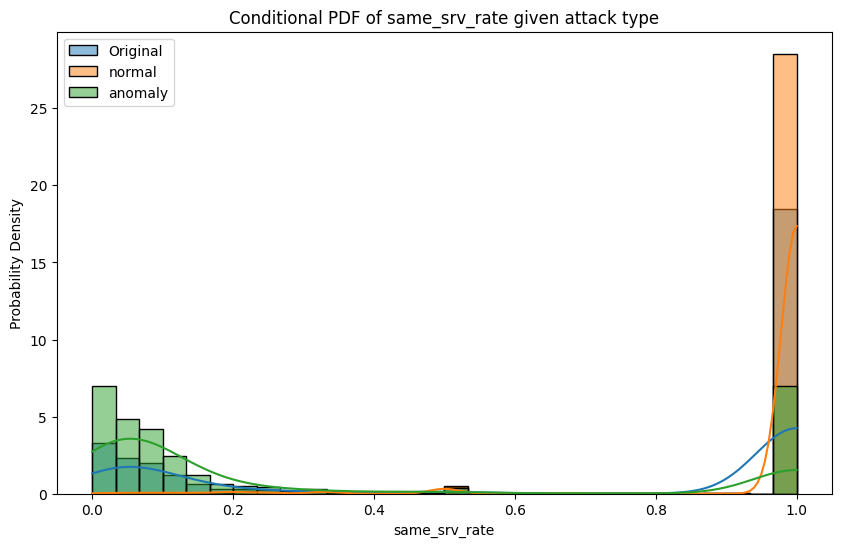

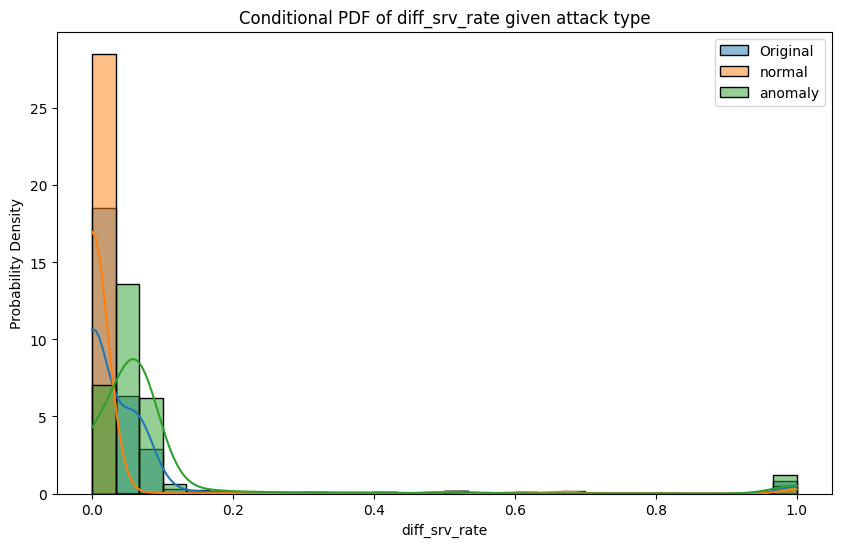

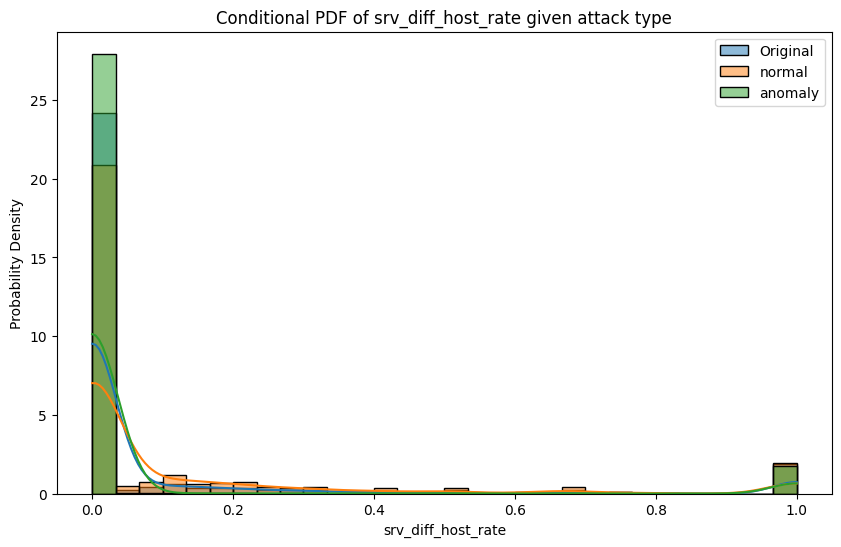

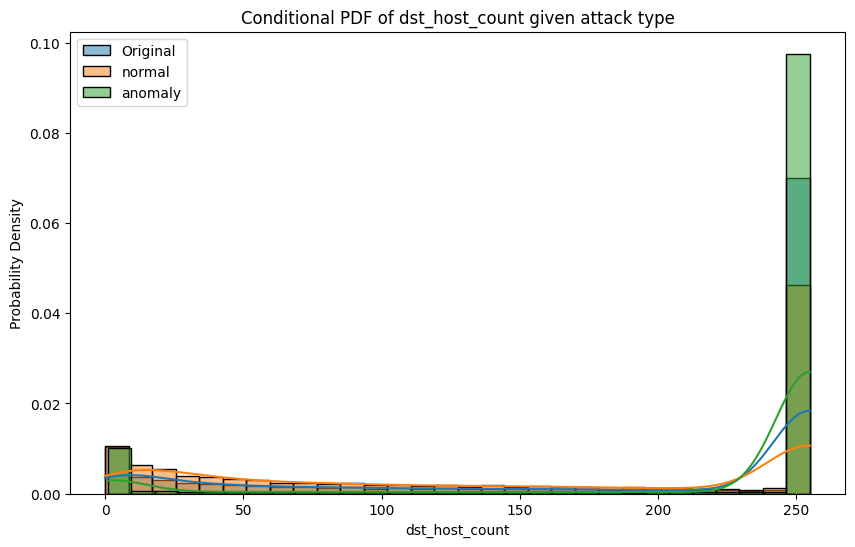

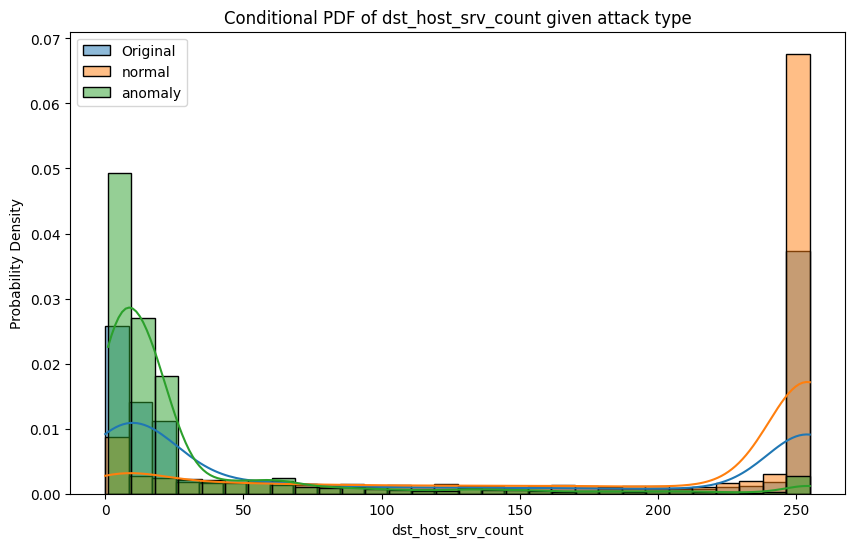

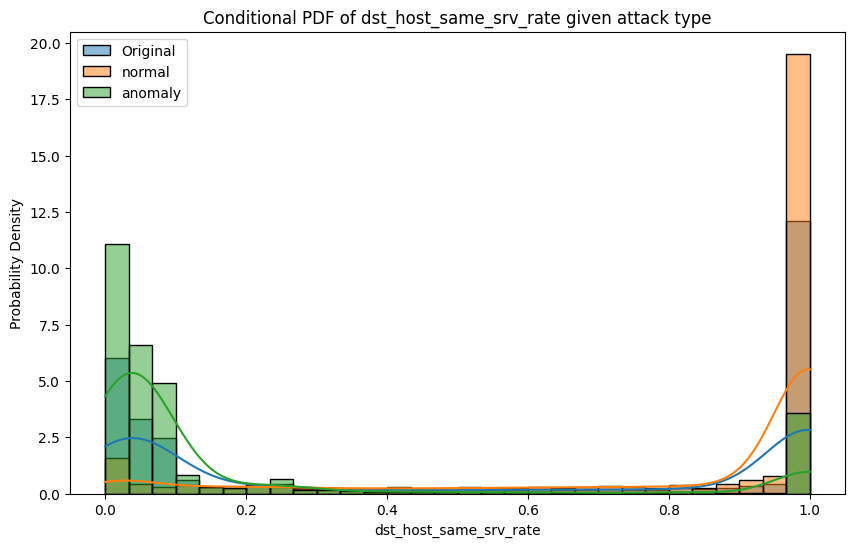

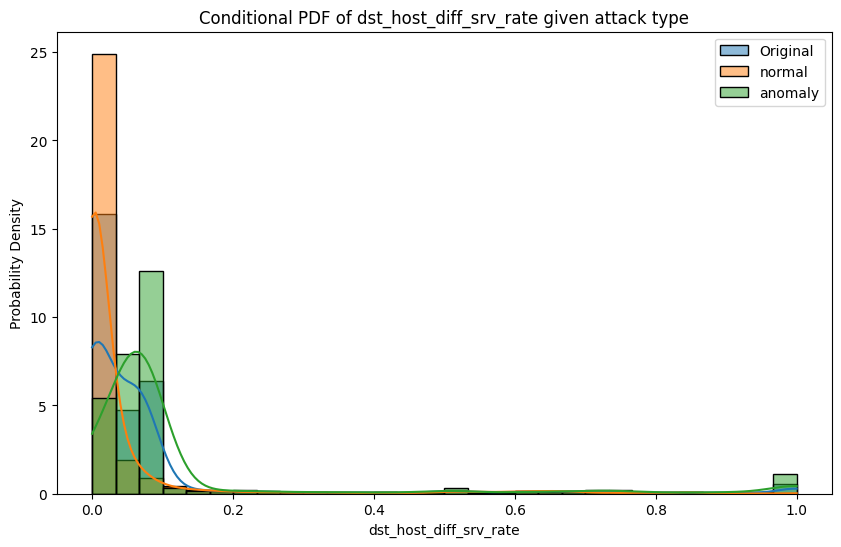

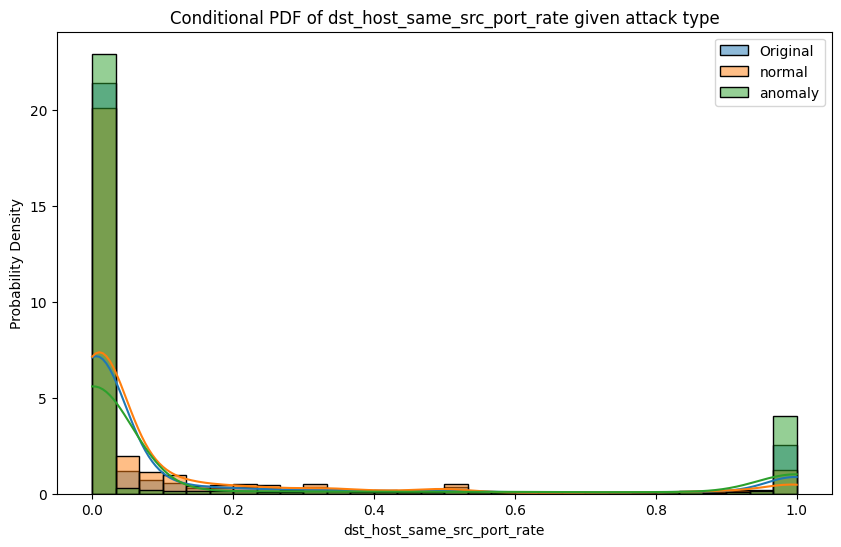

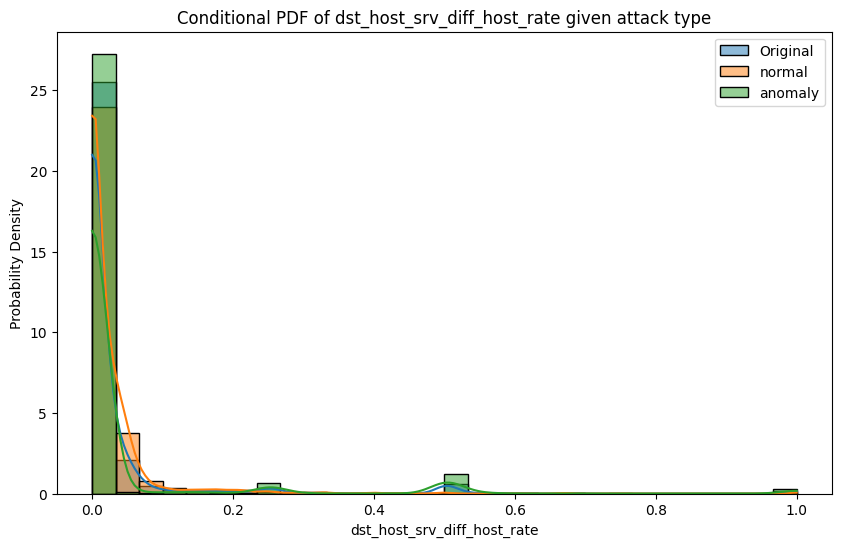

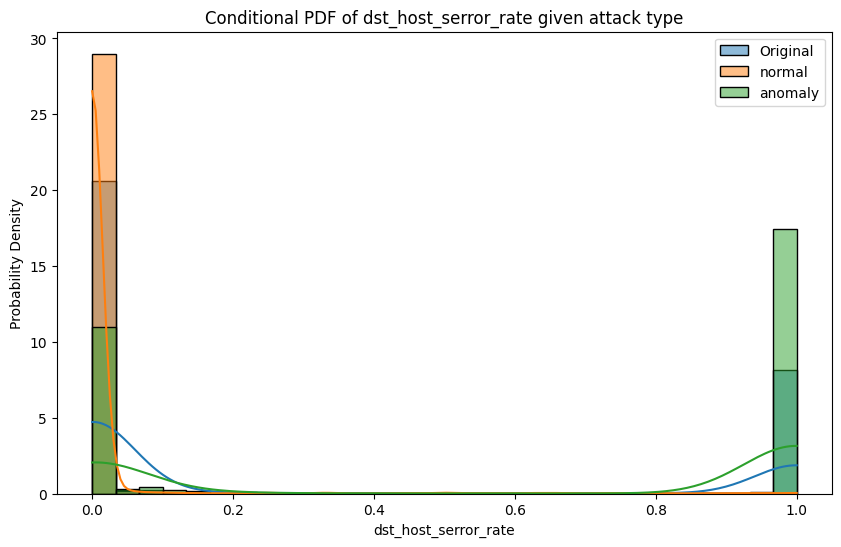

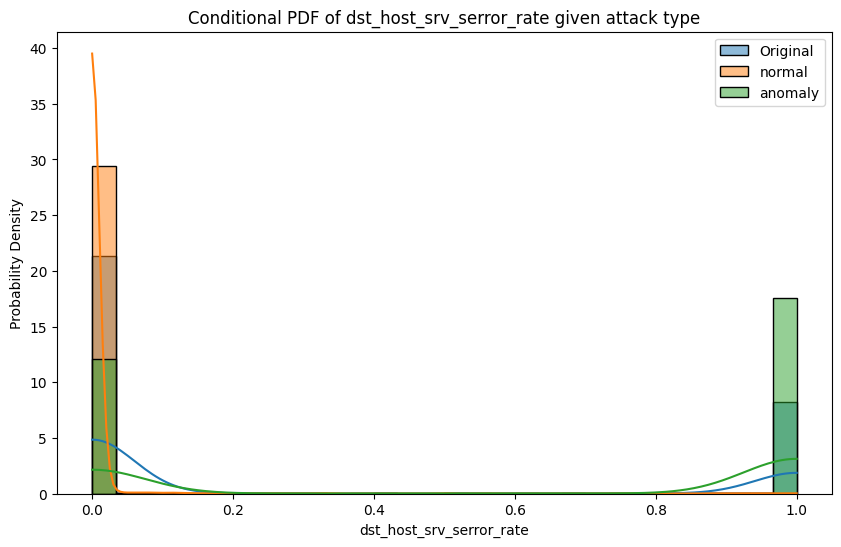

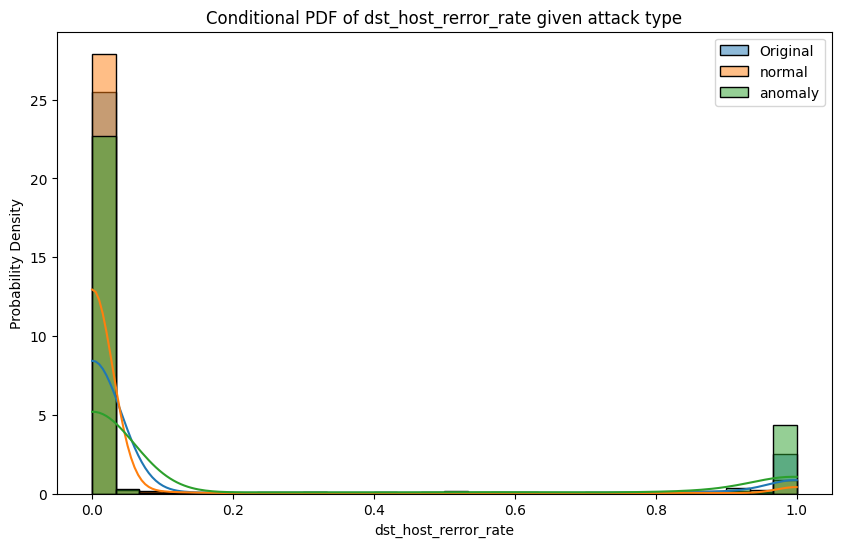

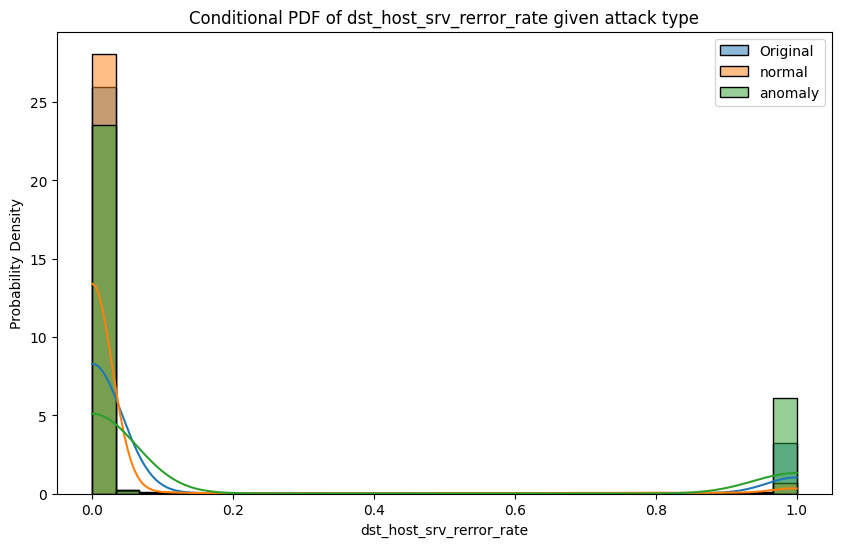

In [ ]:
attack_types = df['class'].unique()
def plot_conditional_pmf_pdf(column):
    if pd.api.types.is_numeric_dtype(df[column]):
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column], bins=30, kde=True, stat='density', label='Original')
        for attack in attack_types:
            sns.histplot(df[df['class'] == attack][column], bins=30, kde=True, stat='density', label=attack)
        plt.title(f'Conditional PDF of {column} given attack type')
        plt.xlabel(column)
        plt.ylabel('Probability Density')
        plt.legend()
        plt.show()

for col in numeric_cols:
    if col != 'class':  
        plot_conditional_pmf_pdf(col)

# Enhanced Step 5:Taking in consideration the category / object type fields

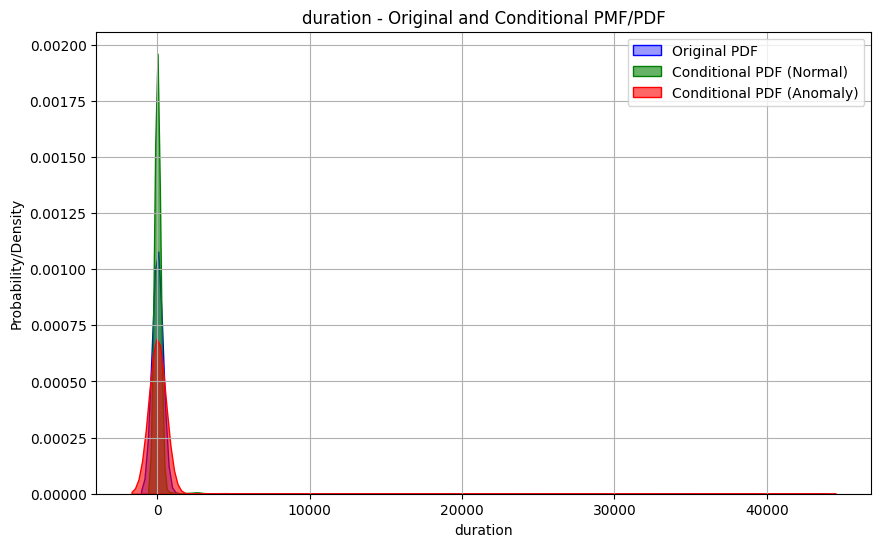

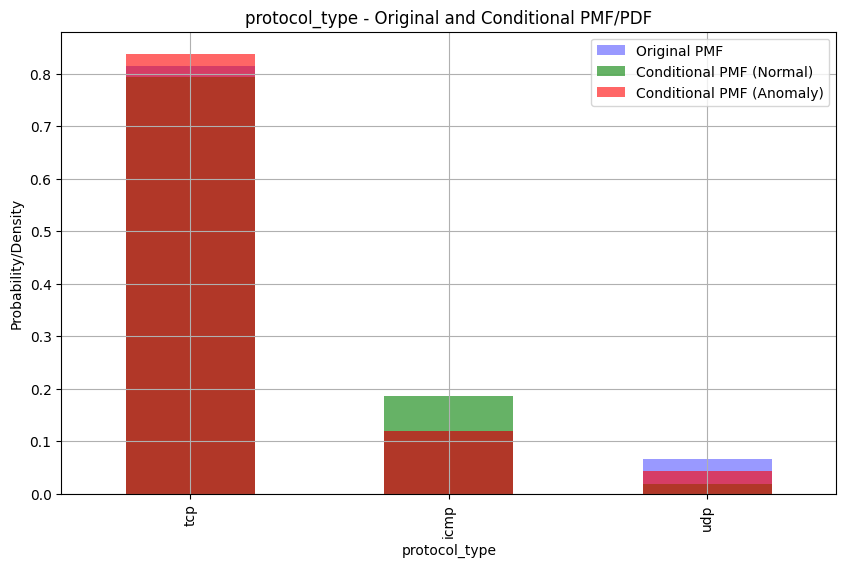

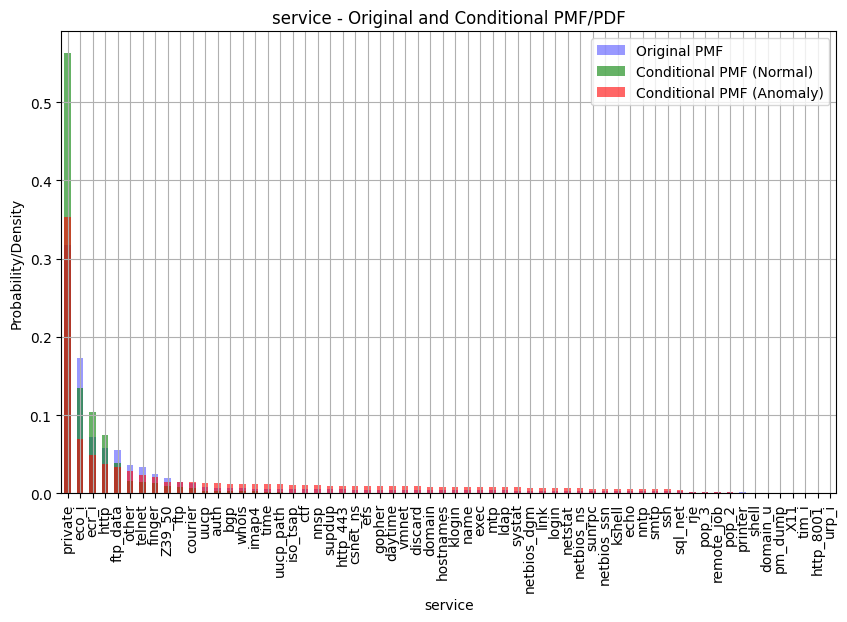

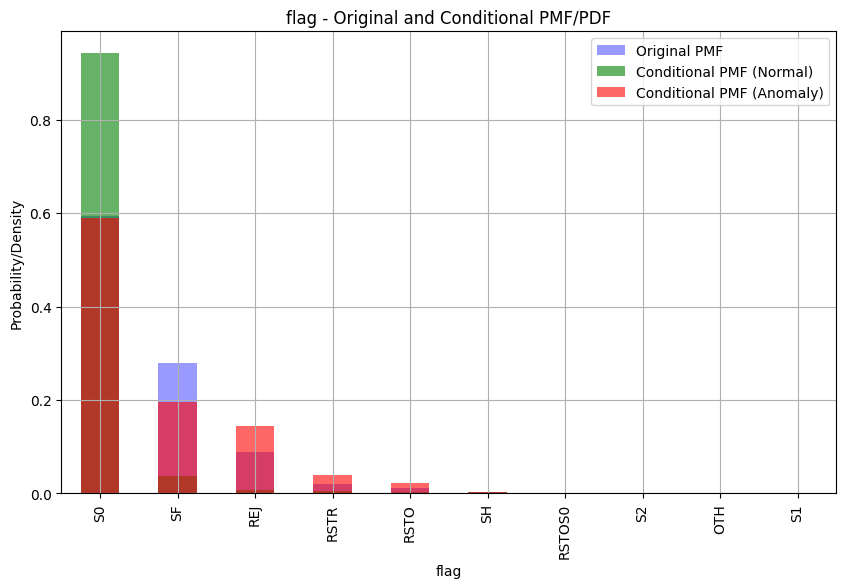

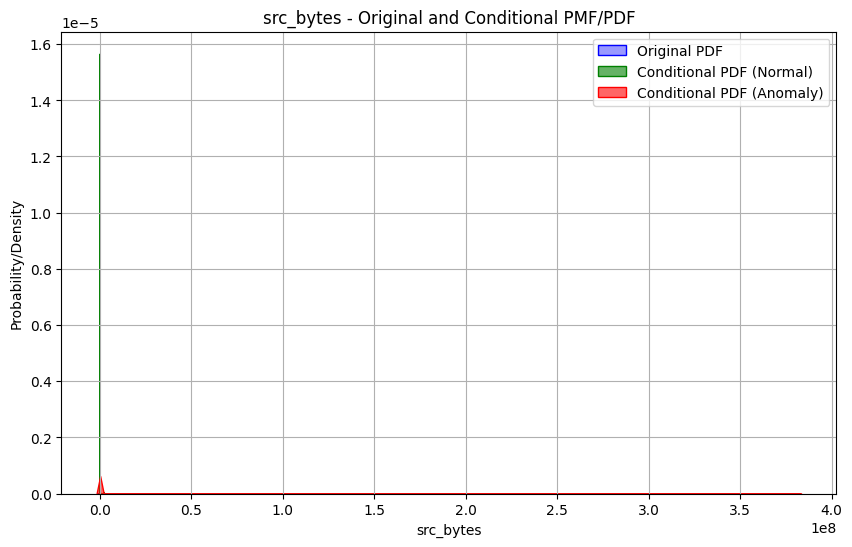

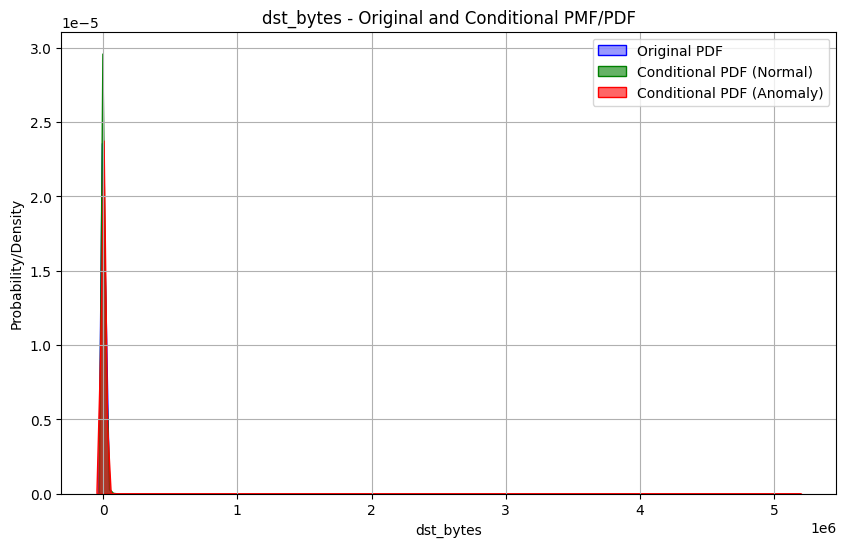

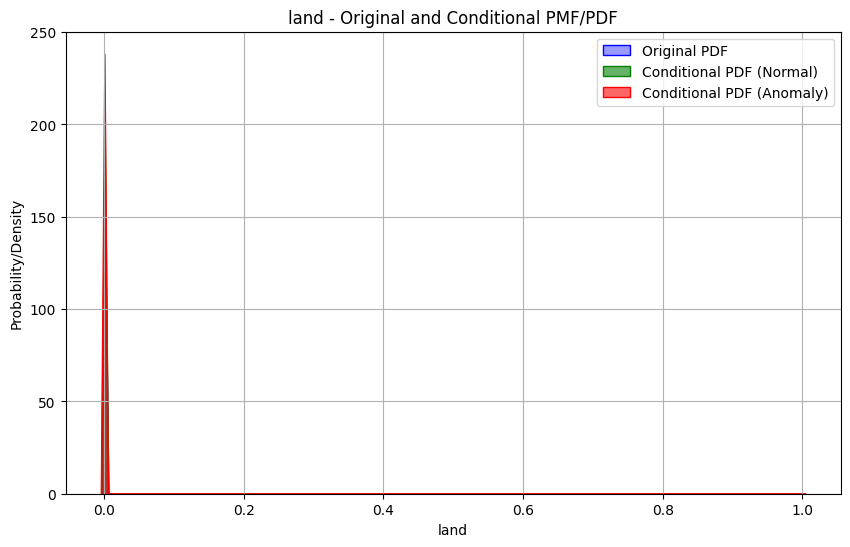

C:\Users\Admin\AppData\Local\Temp\ipykernel_19612\2819825291.py:25: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(normal_rows[column], fill=True, color='green', alpha=0.6, label='Conditional PDF (Normal)')


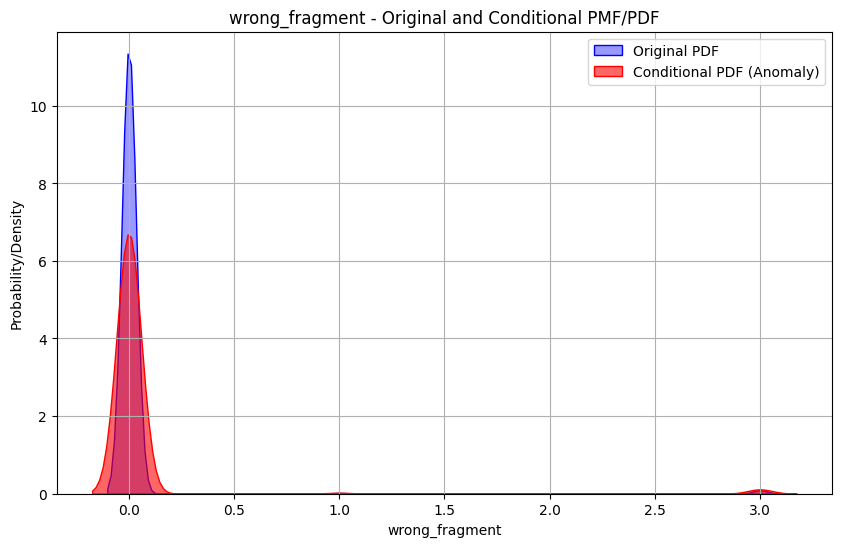

C:\Users\Admin\AppData\Local\Temp\ipykernel_19612\2819825291.py:25: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(normal_rows[column], fill=True, color='green', alpha=0.6, label='Conditional PDF (Normal)')


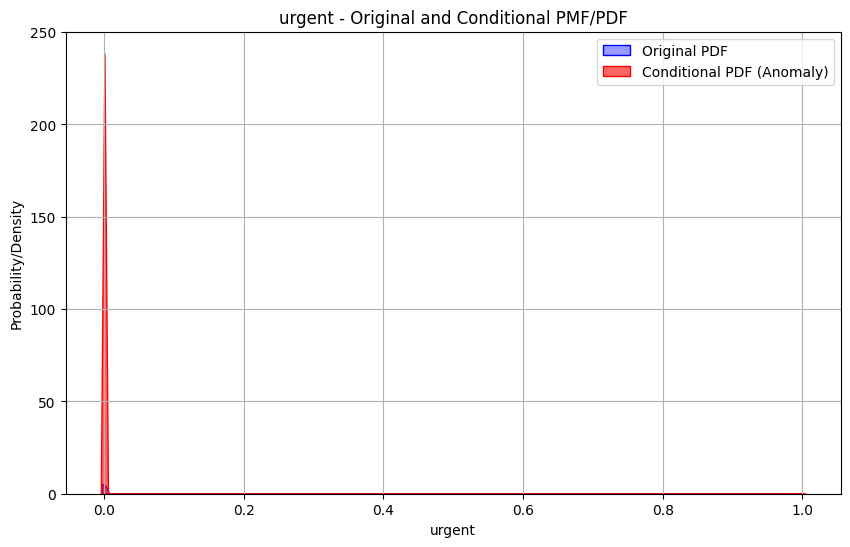

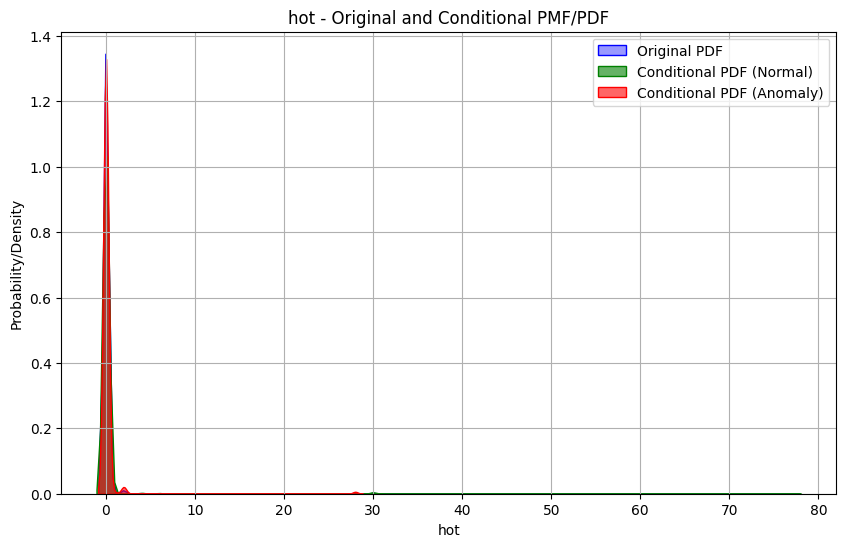

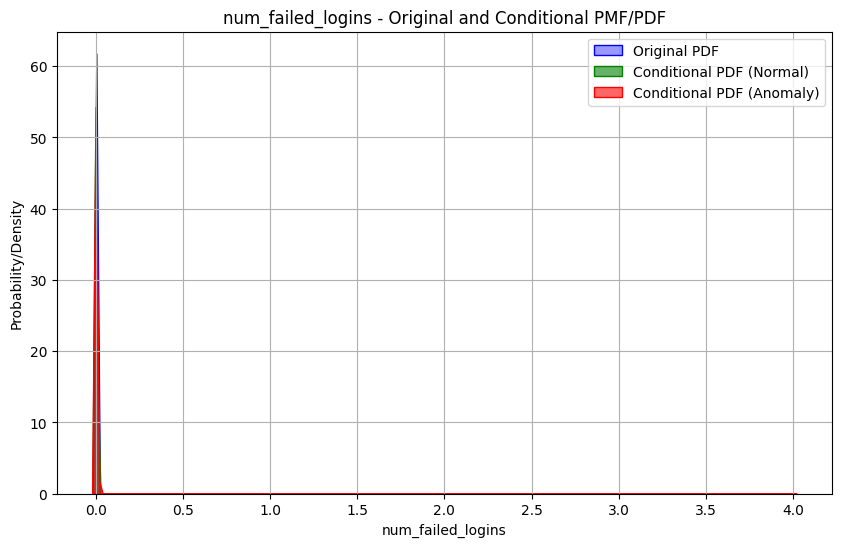

In [ ]:
def plot_pdf_pmf_conditional_original_for_columns(df):
    for column in df.columns:
        if column == 'class':  
            continue

        plt.figure(figsize=(10, 6))  
        # Original PMF/PDF plot
        if df[column].dtype == 'object' or df[column].dtype.name == 'category':
            # Calculate PMF for discrete data
            pmf = df[column].value_counts(normalize=True)
            pmf.plot(kind='bar', color='blue', alpha=0.4, label='Original PMF')
        else:
            # Calculate PDF for continuous data
            sns.kdeplot(df[column], fill=True, color='blue', alpha=0.4, label='Original PDF')

        # Conditional PMF/PDF plot for "normal" class
        normal_rows = df[df['class'] == "normal"]
        if not normal_rows.empty:
            if normal_rows[column].dtype == 'object' or normal_rows[column].dtype.name == 'category':
                # Calculate PMF for discrete data using only "normal" rows
                conditional_pmf_normal = normal_rows[column].value_counts(normalize=True)
                conditional_pmf_normal.plot(kind='bar', color='green', alpha=0.6, label='Conditional PMF (Normal)')
            else:
                # Calculate PDF for continuous data using only "normal" rows
                sns.kdeplot(normal_rows[column], fill=True, color='green', alpha=0.6, label='Conditional PDF (Normal)')

        # Conditional PMF/PDF plot for "anomaly" class
        anomaly_rows = df[df['class'] == "anomaly"]
        if not anomaly_rows.empty:
            if anomaly_rows[column].dtype == 'object' or anomaly_rows[column].dtype.name == 'category':
                # Calculate PMF for discrete data using only "anomaly" rows
                conditional_pmf_anomaly = anomaly_rows[column].value_counts(normalize=True)
                conditional_pmf_anomaly.plot(kind='bar', color='red', alpha=0.6, label='Conditional PMF (Anomaly)')
            else:
                # Calculate PDF for continuous data using only "anomaly" rows
                sns.kdeplot(anomaly_rows[column], fill=True, color='red', alpha=0.6, label='Conditional PDF (Anomaly)')

        plt.title(f'{column} - Original and Conditional PMF/PDF')
        plt.xlabel(column)
        plt.ylabel('Probability/Density')
        plt.legend()
        plt.grid()
        plt.show()

plot_pdf_pmf_conditional_original_for_columns(df)


# Step 6: Scatter plot indicating the relation between two data fields
pd.api.types.is_numeric_dtype(df[x_col]) and  pd.api.types.is_numeric_dtype(df[y_col]) check if the fields are numeric 

In [ ]:

def scatter_plot(x_col, y_col):
    if pd.api.types.is_numeric_dtype(df[x_col]) and pd.api.types.is_numeric_dtype(df[y_col]):
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=df[x_col], y=df[y_col])
        plt.title(f'Scatter plot of {x_col} vs {y_col}')
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.show()

# Example scatter plot between two fields (replace 'src_bytes' and 'dst_bytes' with actual field names)
i = 0
while i < len(df.columns) - 1:  # Adjusted to avoid IndexError
    scatter_plot(df.columns[i], df.columns[i + 1])  # Example columns
    i += 1

# Enhanced Step 6 taking in consideration the non numerical fileds 

we plot non numerical fileds using the sns.stripplot() method

In [ ]:
def scatter_plot(x_col, y_col):
    # Check if both columns are numeric
    if pd.api.types.is_numeric_dtype(df[x_col]) and pd.api.types.is_numeric_dtype(df[y_col]):
        plt.figure(figsize=(10, 8))
        sns.scatterplot(x=df[x_col], y=df[y_col])
        plt.title(f'Scatter plot of {x_col} vs {y_col}')
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.show()
    
    # Check if one column is categorical and the other is numeric
    elif (isinstance(df[x_col].dtype, pd.CategoricalDtype) or df[x_col].dtype == 'object'):
        if pd.api.types.is_numeric_dtype(df[y_col]):
            plt.figure(figsize=(10, 8))
            sns.stripplot(x=df[x_col], y=df[y_col], jitter=True)
            plt.title(f'Strip plot of {x_col} vs {y_col}')
            plt.xlabel(x_col)
            plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
            plt.ylabel(y_col)
            plt.show()
        elif (isinstance(df[y_col].dtype, pd.CategoricalDtype) or df[y_col].dtype == 'object'):
            # Scatter plot for two categorical fields using jitter
            plt.figure(figsize=(10, 8))
            sns.stripplot(x=df[x_col], y=df[y_col], jitter=True, marker='o', alpha=0.7)
            plt.title(f'Scatter plot of {x_col} vs {y_col} (Categorical)')
            plt.xlabel(x_col)
            plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
            plt.ylabel(y_col)
            plt.show()
    
    # Check if the other column is categorical and the first column is numeric
    elif pd.api.types.is_numeric_dtype(df[x_col]) and (isinstance(df[y_col].dtype, pd.CategoricalDtype) or df[y_col].dtype == 'object'):
        plt.figure(figsize=(10, 8))
        sns.stripplot(x=df[y_col], y=df[x_col], jitter=True)
        plt.title(f'Strip plot of {y_col} vs {x_col}')
        plt.xlabel(y_col)
        plt.ylabel(x_col)
        plt.show()

# Iterate through pairs of columns (col1, col2)
i = 0
while i < len(df.columns) - 1:  # Ensure we don't go out of bounds
    scatter_plot(df.columns[i], df.columns[i + 1])
    i += 1


# Step 7: Joint PMF/PDF of any two different fields 

In [ ]:
def plot_joint_pmf_pdf(col1, col2):
    if pd.api.types.is_numeric_dtype(df[col1]) and pd.api.types.is_numeric_dtype(df[col2]):
        plt.figure(figsize=(10, 6))
        sns.histplot(x=df[col1], y=df[col2], bins=30, cbar=True)
        plt.title(f'Joint PDF of {col1} and {col2}')
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.show()
i = 0
while i < len(df.columns) - 1:  
    plot_joint_pmf_pdf(df.columns[i], df.columns[i + 1])  
    i += 1


# Enhanced Step 7 taking in consideration the non numerical fileds 

we plot non numerical fileds using the sns.stripplot() method

In [ ]:
# Enhanced function for joint PDF, heatmap, or strip plot
def plot_joint_pmf_pdf(col1, col2):
    # Check if both columns are numeric
    if pd.api.types.is_numeric_dtype(df[col1]) and pd.api.types.is_numeric_dtype(df[col2]):
        plt.figure(figsize=(10, 6))
        sns.histplot(x=df[col1], y=df[col2], bins=30, cbar=True)
        plt.title(f'Joint PDF of {col1} and {col2}')
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.show()
    
    # Check if both columns are categorical
    elif (isinstance(df[col1].dtype, pd.CategoricalDtype) or df[col1].dtype == 'object') and \
         (isinstance(df[col2].dtype, pd.CategoricalDtype) or df[col2].dtype == 'object'):
        plt.figure(figsize=(10, 6))
        cross_tab = pd.crosstab(df[col1], df[col2])
        sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
        plt.title(f'Heatmap of {col1} vs {col2}')
        plt.xlabel(col2)
        plt.ylabel(col1)
        plt.show()
    
    # Check if one column is categorical and the other is numeric
    elif (isinstance(df[col1].dtype, pd.CategoricalDtype) or df[col1].dtype == 'object') and pd.api.types.is_numeric_dtype(df[col2]):
        plt.figure(figsize=(10, 6))
        sns.stripplot(x=df[col1], y=df[col2])
        plt.title(f'Strip plot of {col1} vs {col2}')
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.show()
        
    elif pd.api.types.is_numeric_dtype(df[col1]) and (isinstance(df[col2].dtype, pd.CategoricalDtype) or df[col2].dtype == 'object'):
        plt.figure(figsize=(10, 6))
        sns.stripplot(x=df[col2], y=df[col1])
        plt.title(f'Strip plot of {col2} vs {col1}')
        plt.xlabel(col2)
        plt.ylabel(col1)
        plt.show()
i = 0
while i < len(df.columns) - 1:  
    plot_joint_pmf_pdf(df.columns[i], df.columns[i + 1])  
    i+=1


# Step 8: Joint PMF/PDF of two different fields conditioned on attack type

df[df['class'] == attack] used to filterr the rows in the column where the type of class is normal or anomaly
LOOPS FOR ALL THE ATTACK TYPES (NORMAL AND ANOMALY)
And makes a graph between the 2 column using the attack type nas filtering

In [ ]:
def plot_conditional_joint_pmf_pdf(col1, col2):
    #(checking if both columns are numeric)
    if pd.api.types.is_numeric_dtype(df[col1]) and pd.api.types.is_numeric_dtype(df[col2]):

        #LOOPS FOR ALL THE ATTACK TYPES (NORMAL AND ANOMALY)
        #And makes a graph between the 2 column using the attack type as filtering

        for attack in attack_types: #attack_types = df['class'].unique()
            plt.figure(figsize=(10, 6))
            sns.histplot(x=df[df['class'] == attack][col1], y=df[df['class'] == attack][col2], bins=30, cbar=True)
            plt.title(f'Joint PDF of {col1} and {col2} given {attack}')
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.show()
i = 0
while i < len(df.columns) - 1:  
    plot_conditional_joint_pmf_pdf(df.columns[i], df.columns[i + 1])  
    i += 1            

# Enhanced Step 8 taking in consideration the non numerical fileds confitioned on attack type 
Conditional Visualization:
Joint PDF for Numeric Fields: Uses sns.histplot() for numeric columns.
Heatmaps for Categorical Fields: Uses sns.heatmap() for categorical columns.
Strip Plots for Mixed Types: Uses sns.stripplot() for one numeric and one categorical column.

In [ ]:
def plot_joint_pmf_pdf(df, col1, col2):
    # Ensure the specified columns exist in the DataFrame
    if col1 not in df.columns or col2 not in df.columns:
        print(f"One or both columns '{col1}' and '{col2}' are not in the DataFrame.")
        return

    # Define the attack classes explicitly as normal and anomaly
    attack_types = df['class'].unique()  # Get unique attack types from the class column

    for attack in attack_types:
        plt.figure(figsize=(14, 12))

        # Filter DataFrame for the current attack type
        filtered_data = df[df['class'] == attack]

        # Check if both columns are numeric
        if pd.api.types.is_numeric_dtype(filtered_data[col1]) and pd.api.types.is_numeric_dtype(filtered_data[col2]):
            sns.histplot(x=filtered_data[col1], y=filtered_data[col2], bins=30, cbar=True)
            plt.title(f'Joint PDF of {col1} and {col2} given class: {attack}')
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.show()
        
        # Check if both columns are categorical
        elif (isinstance(filtered_data[col1].dtype, pd.CategoricalDtype) or filtered_data[col1].dtype == 'object') and \
             (isinstance(filtered_data[col2].dtype, pd.CategoricalDtype) or filtered_data[col2].dtype == 'object'):
            cross_tab = pd.crosstab(filtered_data[col1], filtered_data[col2])
            sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
            plt.title(f'Heatmap of {col1} vs {col2} given class: {attack}')
            plt.xlabel(col2)
            plt.ylabel(col1)
            plt.show()
        
        # Check if one column is categorical and the other is numeric
        elif (isinstance(filtered_data[col1].dtype, pd.CategoricalDtype) or filtered_data[col1].dtype == 'object') and pd.api.types.is_numeric_dtype(filtered_data[col2]):
            sns.stripplot(x=filtered_data[col1], y=filtered_data[col2])
            plt.title(f'Strip plot of {col1} vs {col2} given class: {attack}')
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.show()
        
        elif pd.api.types.is_numeric_dtype(filtered_data[col1]) and (isinstance(filtered_data[col2].dtype, pd.CategoricalDtype) or filtered_data[col2].dtype == 'object'):
            sns.stripplot(x=filtered_data[col2], y=filtered_data[col1])
            plt.title(f'Strip plot of {col2} vs {col1} given class: {attack}')
            plt.xlabel(col2)
            plt.ylabel(col1)
            plt.show()

i = 0
while i < len(df.columns) - 1:  
    plot_joint_pmf_pdf(df, df.columns[i], df.columns[i + 1])  
    i += 1 


# Step 9: Calculate and display the correlation matrix 

A correlation matrix is made for numerical data fields, as, for the object fields we can use one hot coding to give each category a number

In [ ]:
#Get all the columns that have numerical values
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

The corr() returns a matix with the correlation coeficients of each 2 fields
the diagonal is always 1 as each matrix is fully dependat on itself

In [ ]:
plt.figure(figsize=(36, 30))  # Adjust figure size for better clarity
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

correlation is the measure of linear relationship and it ranges between -1 and 1 
Also the covariance() ranges between -1 and 1

In [ ]:
threshold = 0.5
high_corr_matrix = correlation_matrix[(correlation_matrix > threshold) | (correlation_matrix < -threshold)]
mid_corr_matrix= correlation_matrix[(correlation_matrix>=0.3) & ( correlation_matrix<0.5)| (correlation_matrix<=0.3) & ( correlation_matrix>0.5)]
low_corr_matrix= correlation_matrix[(correlation_matrix>=0.1) & ( correlation_matrix<0.3)| (correlation_matrix<=0.1) & ( correlation_matrix>0.3) ]
plt.figure(figsize=(36, 30))  # Adjust figure size for better clarity
sns.heatmap(high_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Filtered Correlation Matrix (1> Threshold > 0.5)')
plt.show()
plt.figure(figsize=(36, 30))  # Adjust figure size for better clarity
sns.heatmap(mid_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Filtered Correlation Matrix (0.5> Threshhold >0.3)')
plt.show()
plt.figure(figsize=(36, 30))
sns.heatmap(low_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Filtered Correlation Matrix (0.3> Threshhold >0.1)')
plt.show()

# Step 10 

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Convert string columns to numerical values
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create the high correlation matrix
high_corr_matrix = correlation_matrix[(correlation_matrix > threshold) | (correlation_matrix < -threshold)]

# Get the correlation of each field with the 'class' field
class_correlation = correlation_matrix['class']

# Filter fields with a correlation higher than 0.5 (excluding 'class' itself)
high_correlation_fields = class_correlation[class_correlation > 0.5].drop('class')

# Print all fields with correlation higher than 0.5 with 'class'
print("Fields with a correlation higher than 0.5 with 'class':")
for field, correlation in high_correlation_fields.items():
    print(f"{field}: {correlation}")

# Optionally, find and print the field with the highest correlation
if not high_correlation_fields.empty:
    highest_correlation_field = high_correlation_fields.idxmax()
    print(f"The field with the highest correlation to 'class' is: {highest_correlation_field} with a correlation of {high_correlation_fields[highest_correlation_field]}")
else:
    print("No fields have a correlation greater than 0.5 with 'class'.")